### Gumbel-Quantize VAE

In [1]:
import numpy as np
np.set_printoptions(precision=2)
import torch
import torch.nn as nn
import torch.nn.functional as F 
import matplotlib.pyplot as plt
from vae import GQVAE_Class,gqvae_mnist_debug
from util import ikdpp,torch2np,np2torch
%matplotlib inline
%config InlineBackend.figure_format='retina'
print ("Torch version:[%s]"%(torch.__version__))

Torch version:[1.12.0.dev20220519]


### MNIST

In [2]:
from torchvision import datasets,transforms
mnist_train = datasets.MNIST(
    root='../data/',train=True,transform=transforms.ToTensor(),download=True)
mnist_test  = datasets.MNIST(
    root='../data/',train=False,transform=transforms.ToTensor(),download=True)
# Training data
x_train_torch = mnist_train.data.float().reshape(-1,784)/255.
y_train_torch = mnist_train.targets
x_test_torch  = mnist_test.data.float().reshape(-1,784)/255.
y_test_torch  = mnist_test.targets
x_train_np,x_test_np = torch2np(x_train_torch),torch2np(x_test_torch)
y_train_np,y_test_np = torch2np(y_train_torch),torch2np(y_test_torch)
n_train,n_test = x_train_np.shape[0],x_test_np.shape[0]
print ("x_train_np:%s x_test_np:%s"%(x_train_np.shape,x_test_np.shape,))
print ("n_train:[%d] n_test:[%d]"%(n_train,n_test))

x_train_np:(60000, 784) x_test_np:(10000, 784)
n_train:[60000] n_test:[10000]


/opt/homebrew/Caskroom/miniforge/base/envs/torch-mac/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


### Configuration

In [3]:
G = GQVAE_Class(
    name     = 'GQVAE',
    x_dim    = 784,
    z_dim    = 16,
    K        = 20,
    beta     = 0.01,
    e_min    = -2.0,
    e_max    = +2.0,
    tau_max  = 1.0,
    tau_min  = 0.01,
    h_dims   = [256,256],
    actv_enc = nn.ReLU(),
    actv_dec = nn.ReLU(),
    actv_out = None,
    device   = 'cpu'
)
print ("[%s] instantiated"%(G.name))
# Hyperparameters
n_epoch,print_every,batch_size,plot_every = 100,1,128,10
n_it = (n_train//batch_size) + 1 # number of iterations
optm = torch.optim.Adam(
    params       = G.parameters(),
    lr           = 1e-3,
    betas        = (0.5,0.9),  # (0.9, 0.999)
    eps          = 1e-6,
    weight_decay = 1e-5,
)

[GQVAE] instantiated


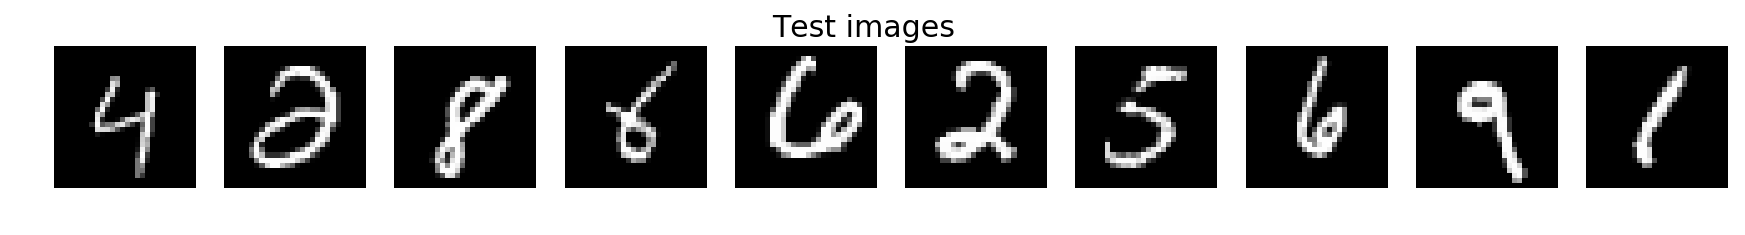

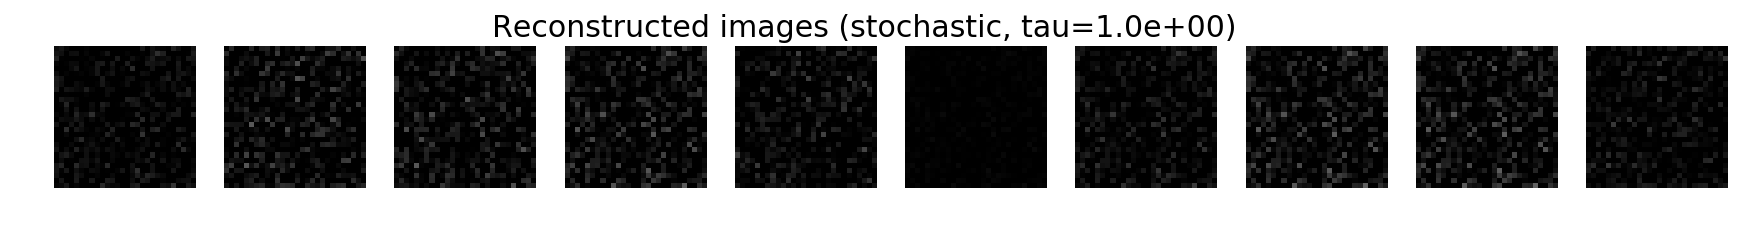

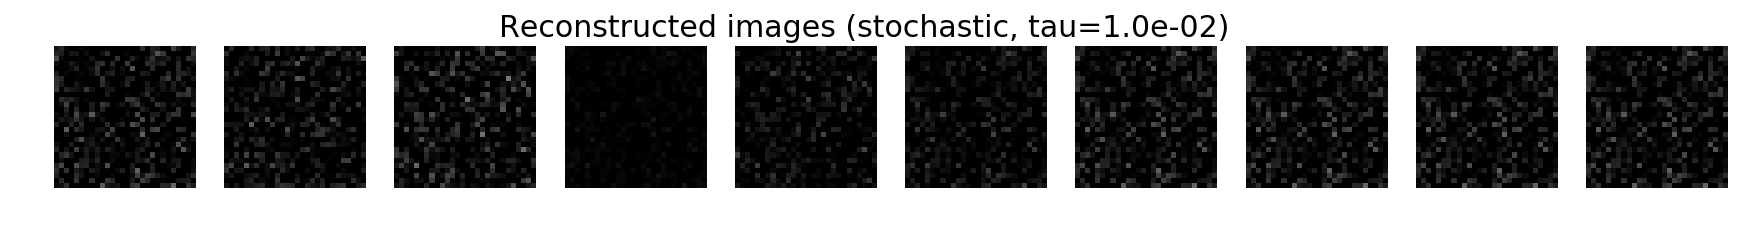

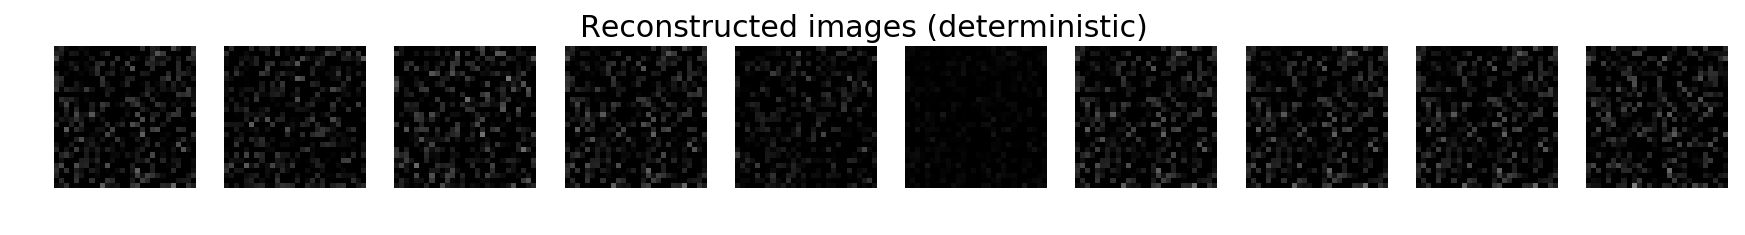

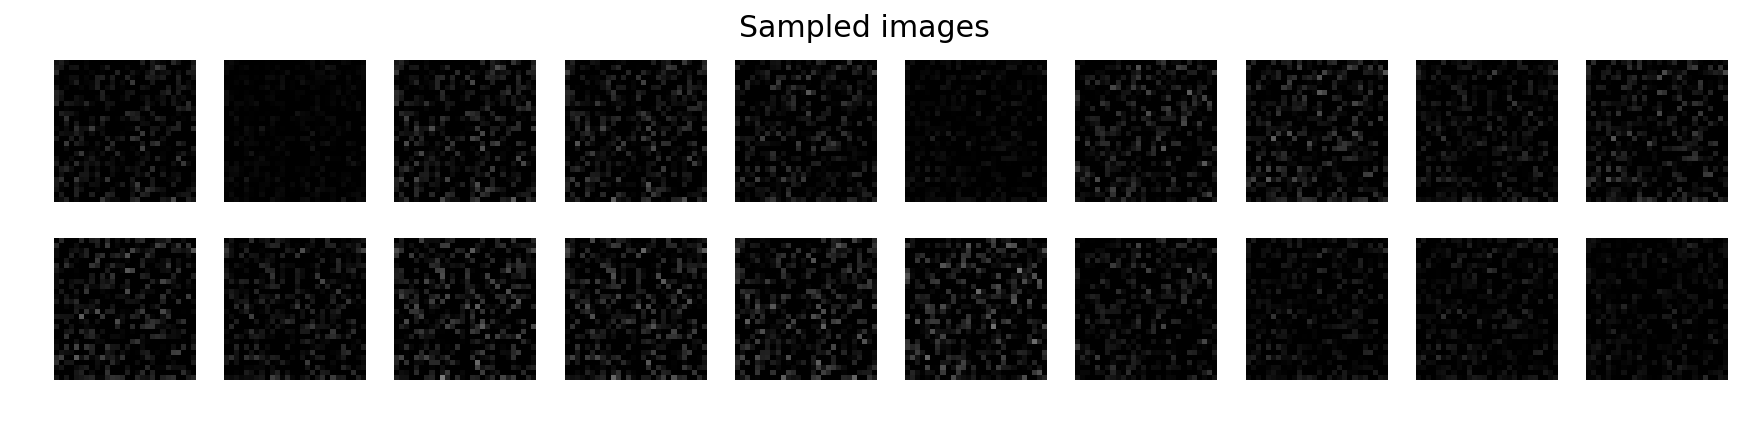

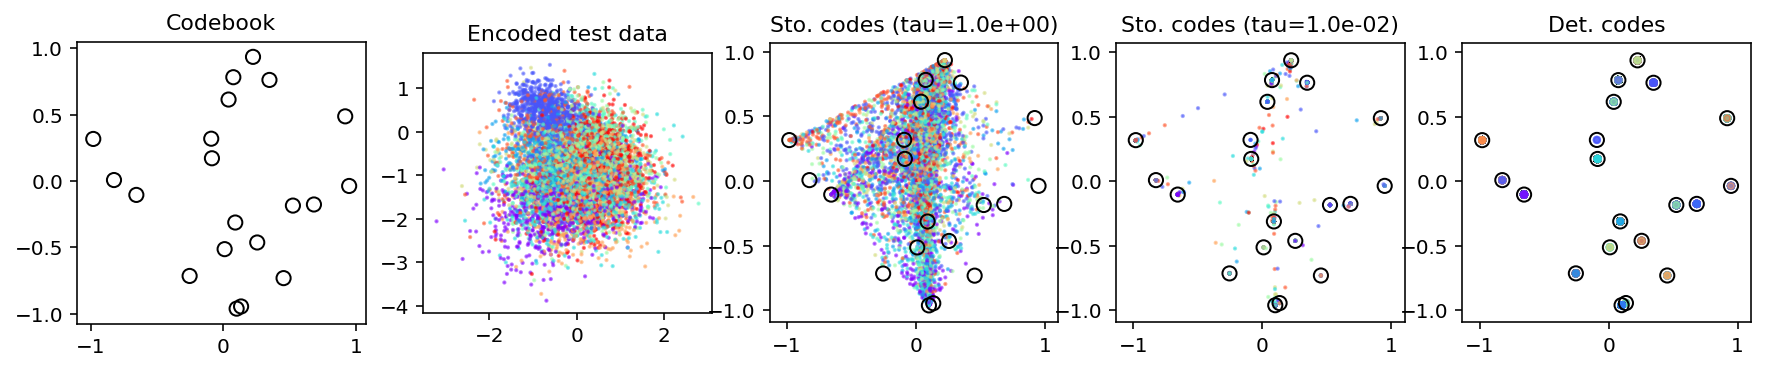

In [4]:
gqvae_mnist_debug(G=G,x_test_np=x_test_np,y_test_np=y_test_np)

Start training.
[0/100] total:[0.978] recon:[0.979] embedding:[-0.001]


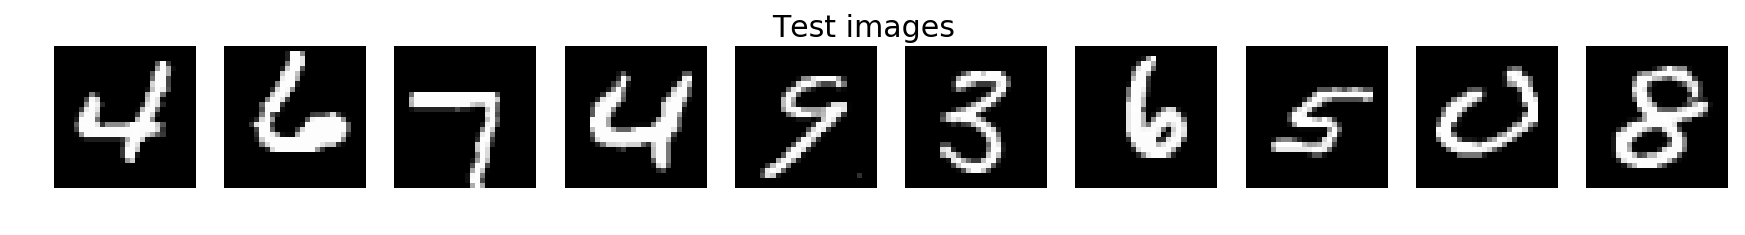

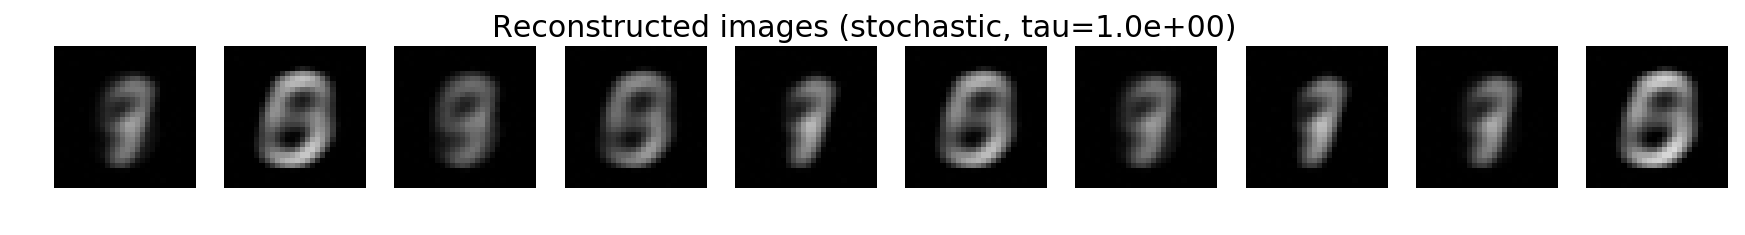

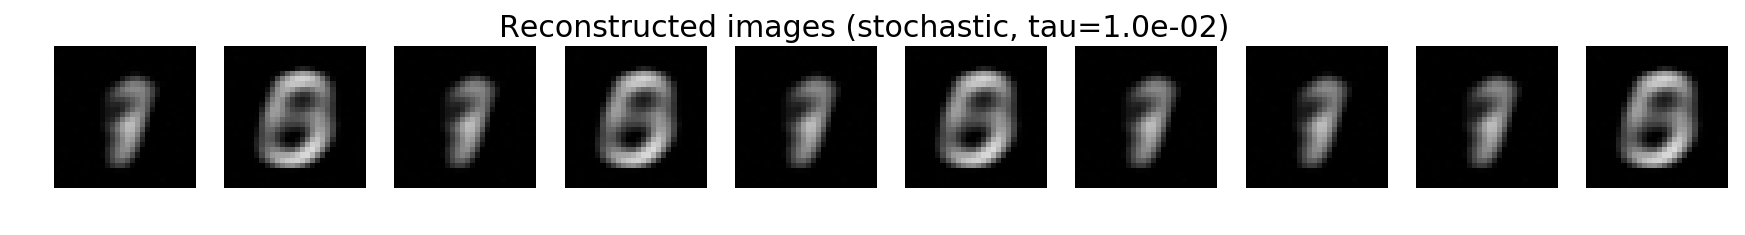

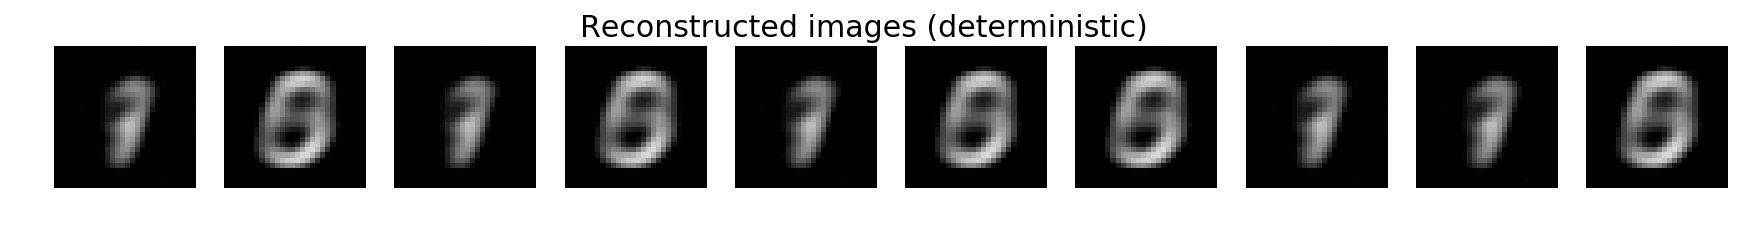

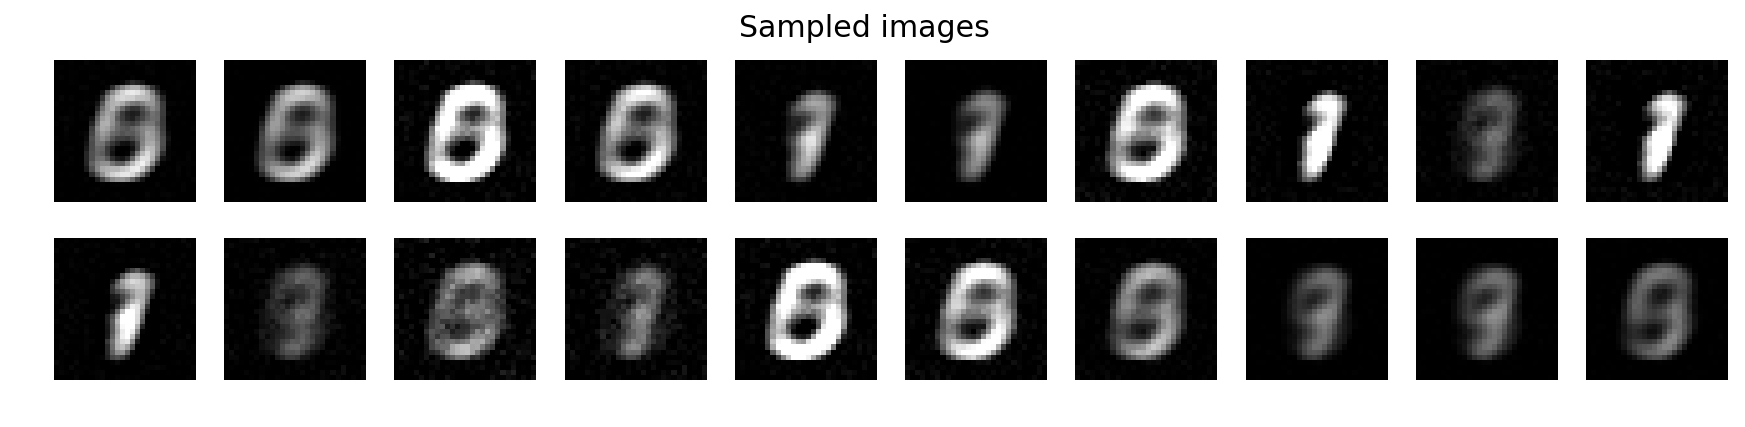

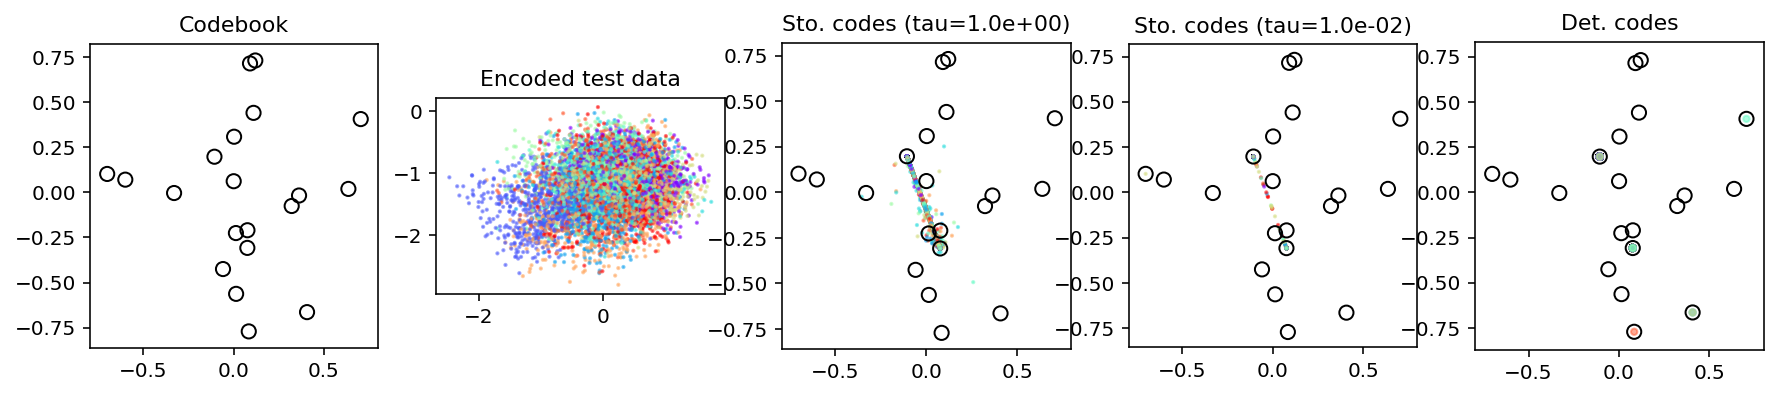

[1/100] total:[0.900] recon:[0.904] embedding:[-0.004]
[2/100] total:[0.858] recon:[0.862] embedding:[-0.005]
[3/100] total:[0.824] recon:[0.829] embedding:[-0.005]
[4/100] total:[0.802] recon:[0.809] embedding:[-0.007]
[5/100] total:[0.783] recon:[0.789] embedding:[-0.006]
[6/100] total:[0.771] recon:[0.776] embedding:[-0.005]
[7/100] total:[0.759] recon:[0.764] embedding:[-0.005]
[8/100] total:[0.750] recon:[0.754] embedding:[-0.004]
[9/100] total:[0.740] recon:[0.744] embedding:[-0.005]
[10/100] total:[0.732] recon:[0.736] embedding:[-0.004]


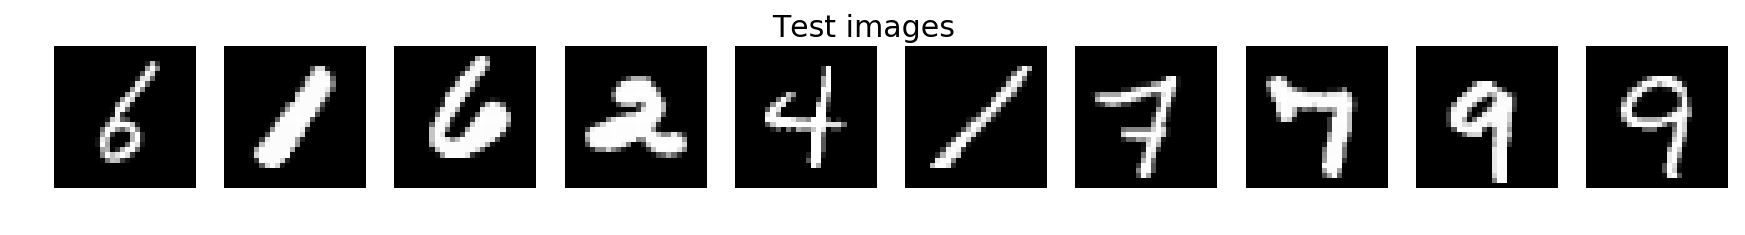

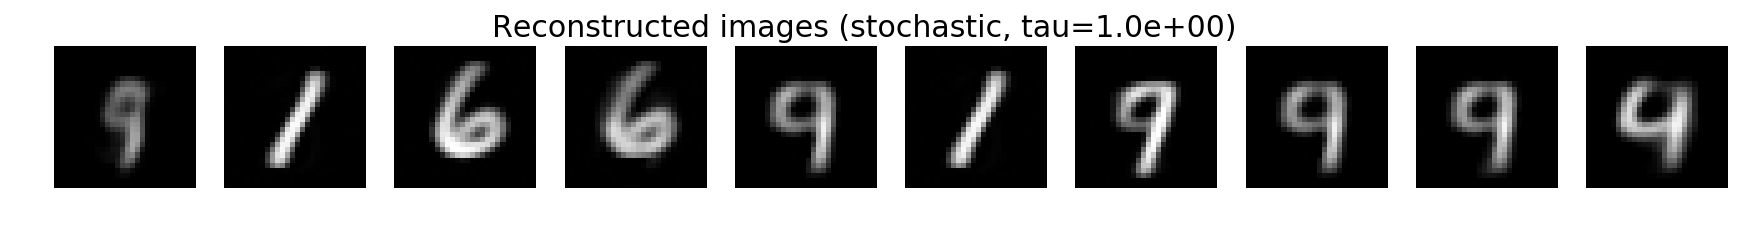

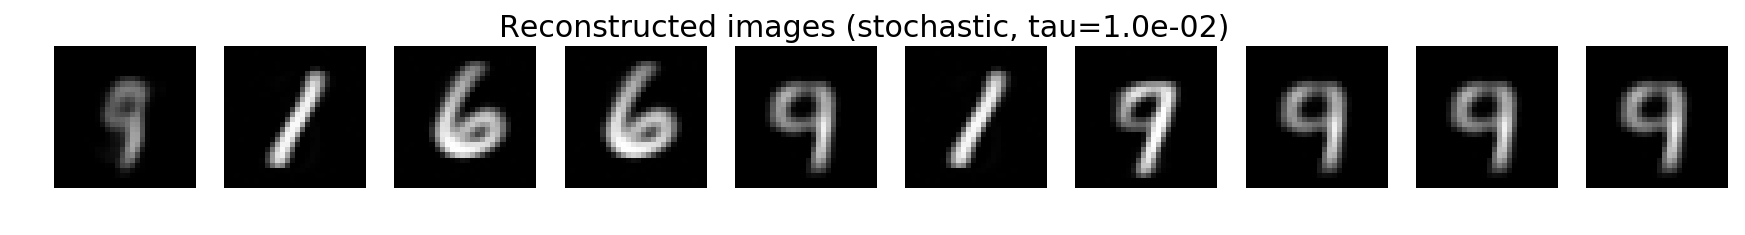

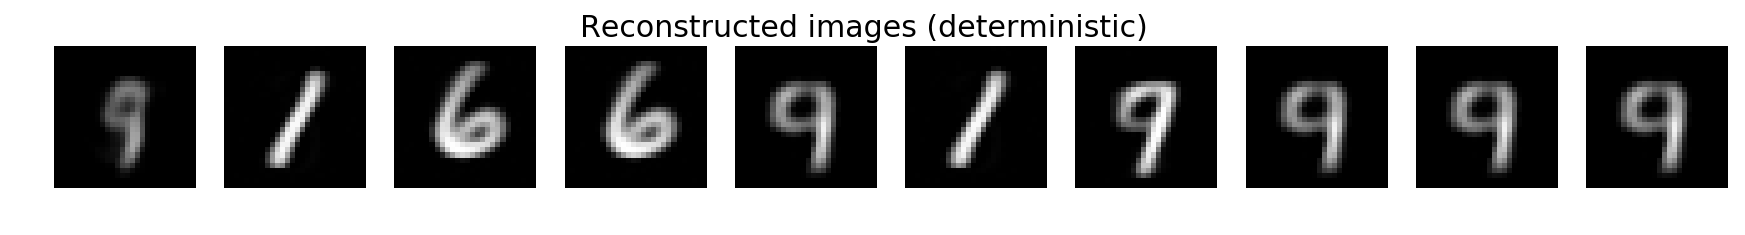

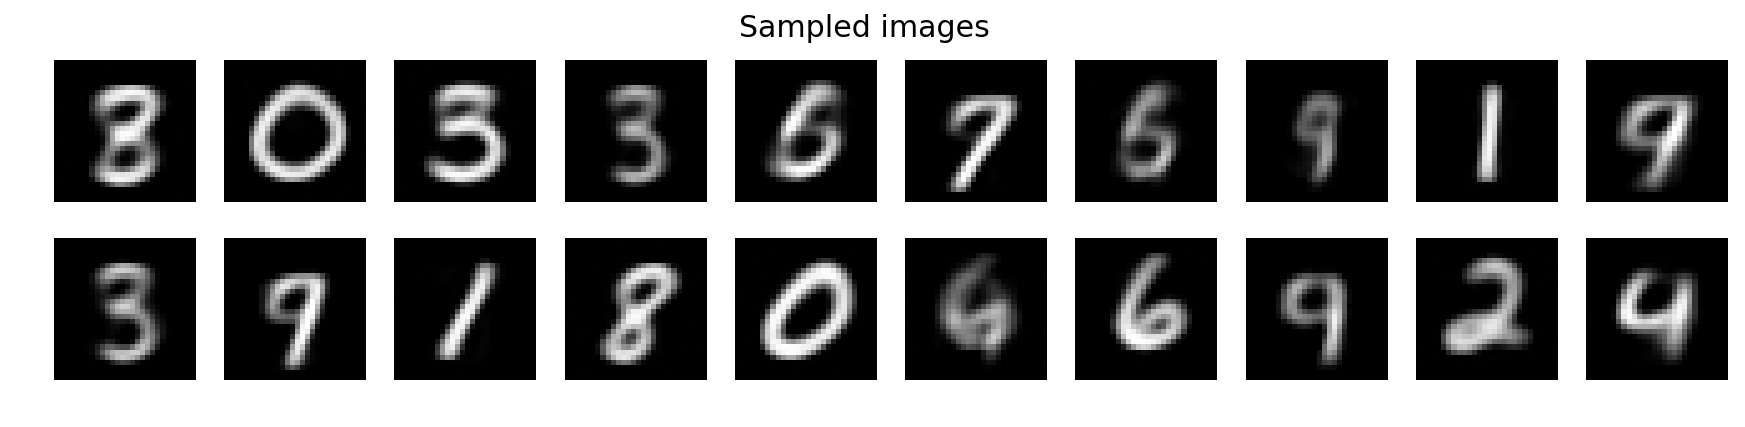

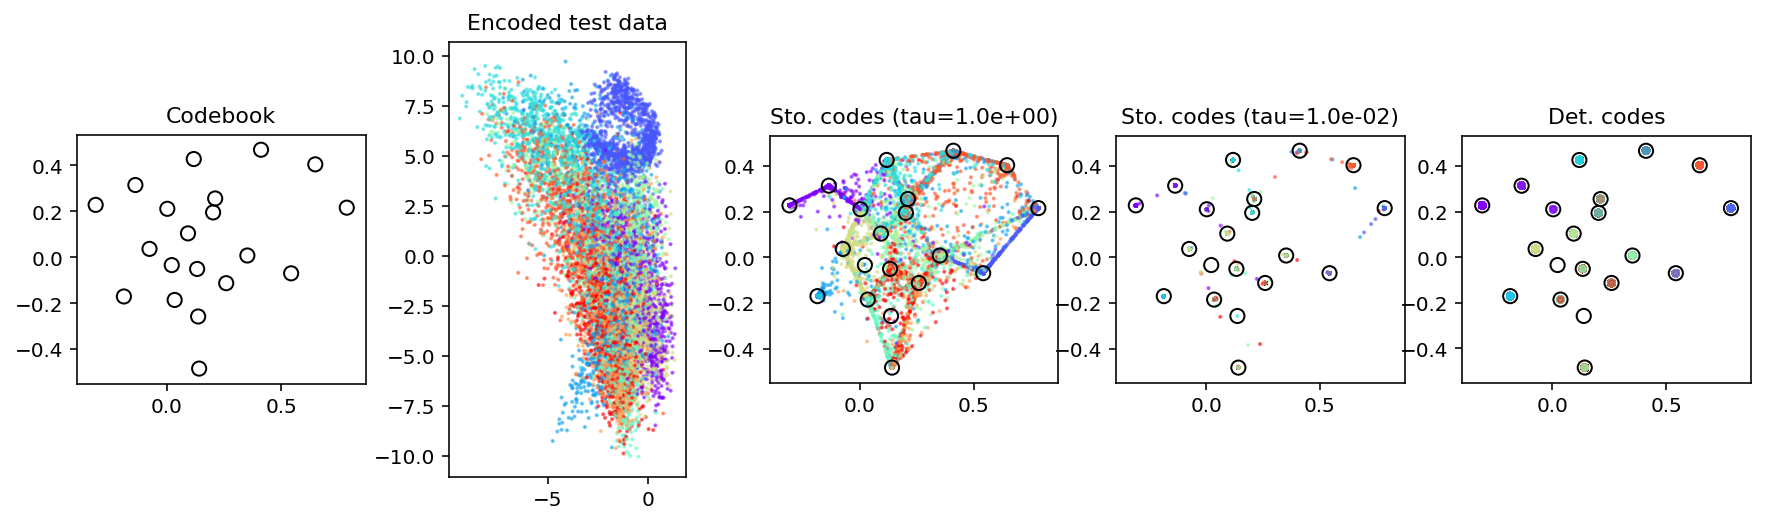

[11/100] total:[0.728] recon:[0.731] embedding:[-0.004]
[12/100] total:[0.724] recon:[0.728] embedding:[-0.004]
[13/100] total:[0.720] recon:[0.724] embedding:[-0.004]
[14/100] total:[0.716] recon:[0.720] embedding:[-0.004]
[15/100] total:[0.714] recon:[0.717] embedding:[-0.004]
[16/100] total:[0.711] recon:[0.715] embedding:[-0.003]
[17/100] total:[0.709] recon:[0.713] embedding:[-0.003]
[18/100] total:[0.708] recon:[0.711] embedding:[-0.003]
[19/100] total:[0.706] recon:[0.709] embedding:[-0.003]
[20/100] total:[0.705] recon:[0.709] embedding:[-0.003]


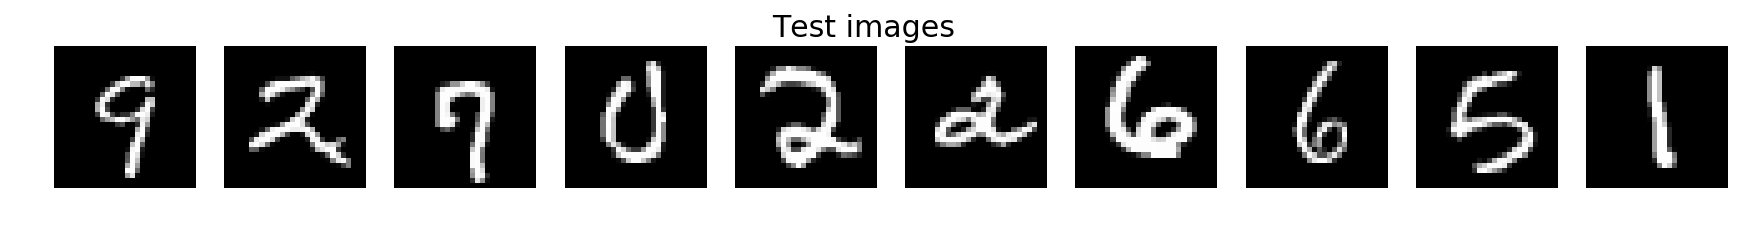

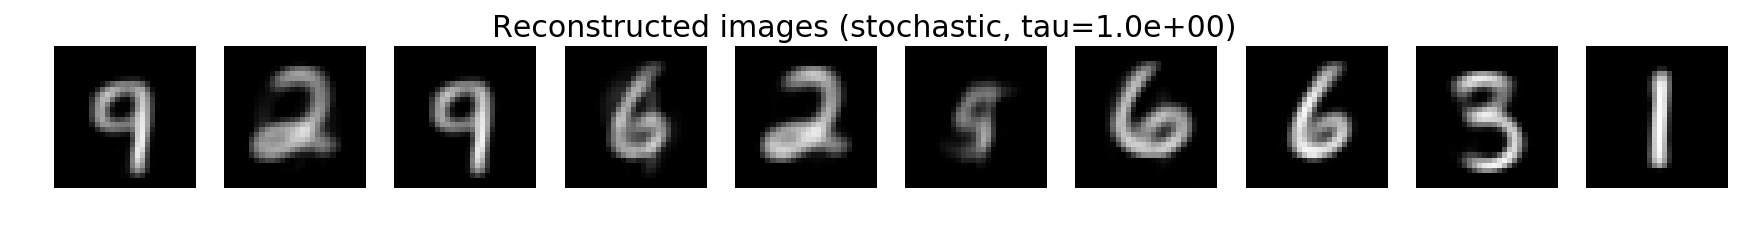

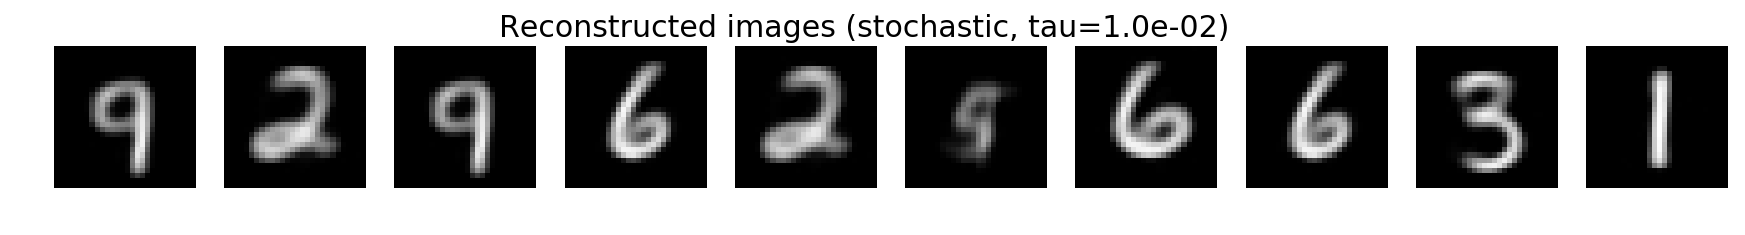

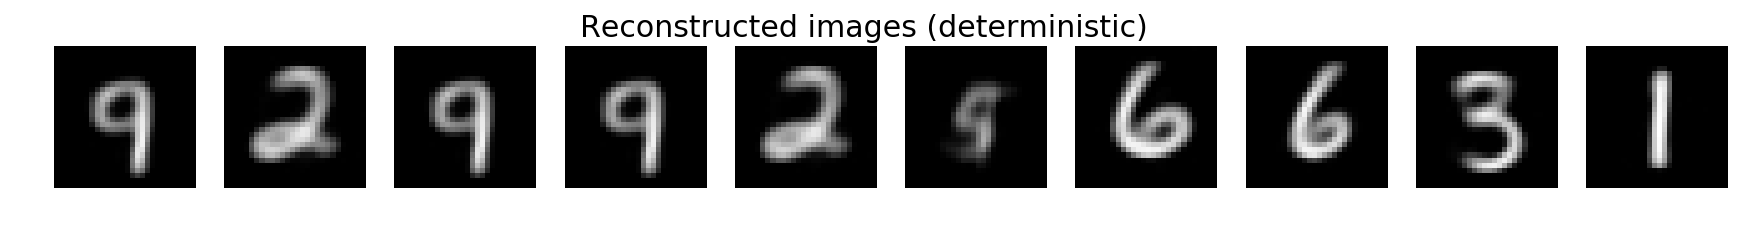

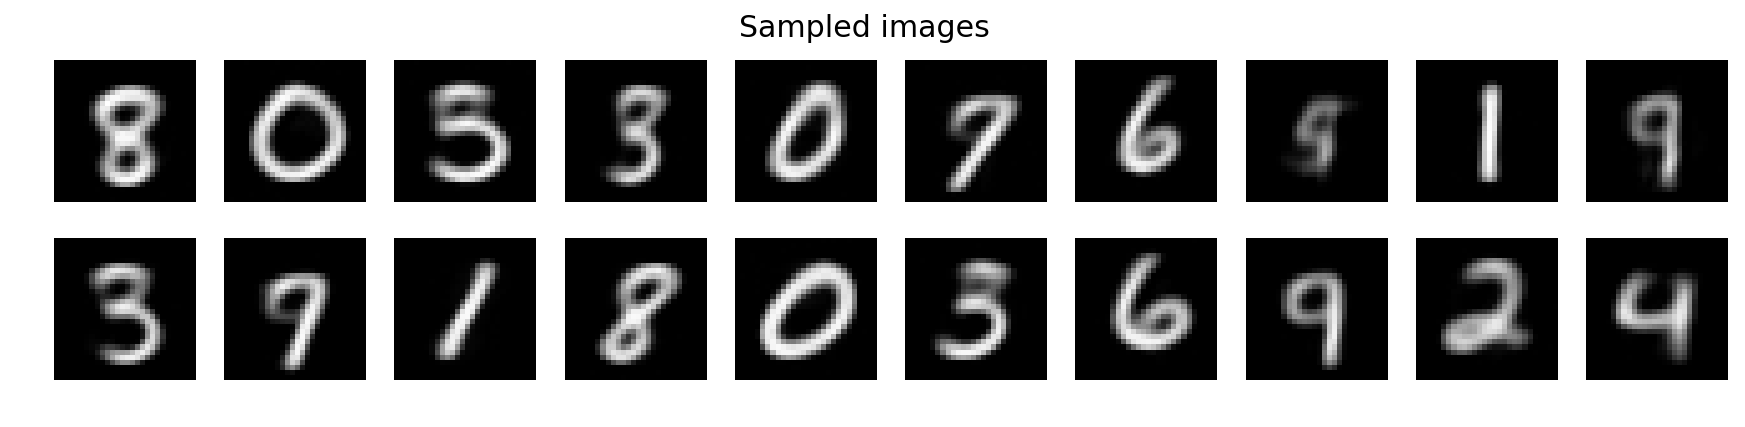

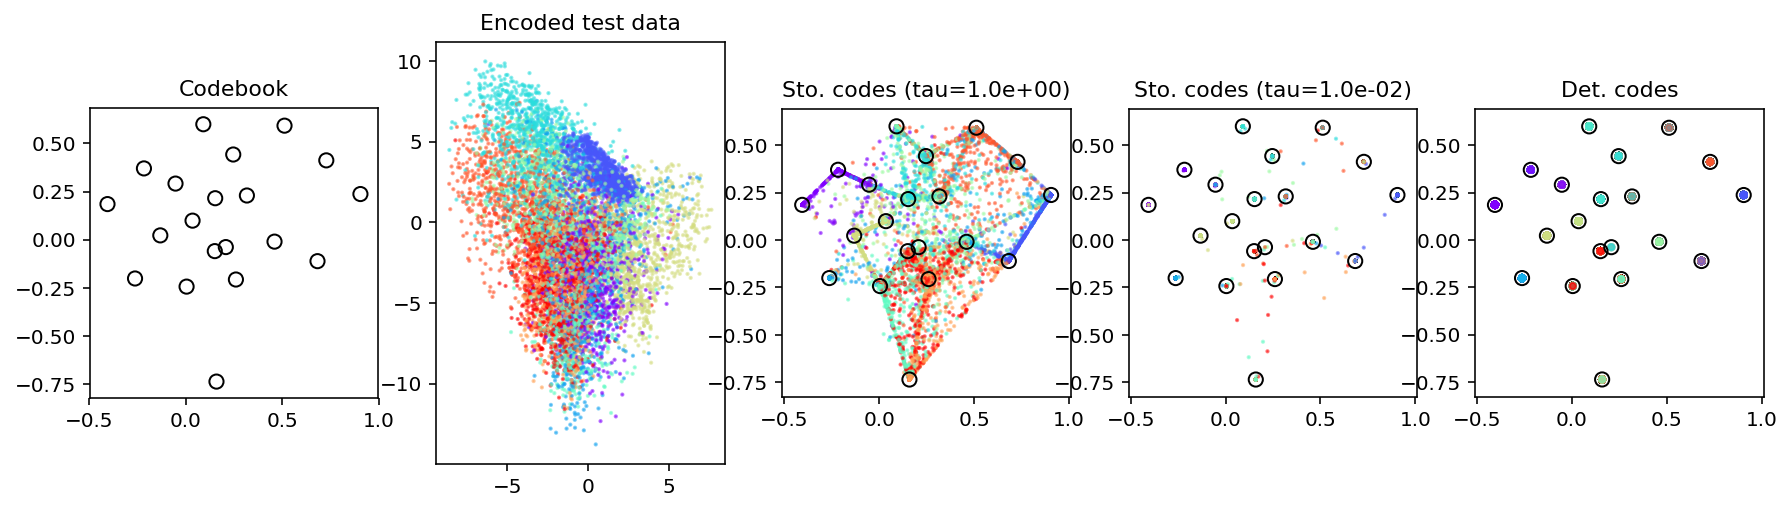

[21/100] total:[0.703] recon:[0.707] embedding:[-0.003]
[22/100] total:[0.702] recon:[0.705] embedding:[-0.003]
[23/100] total:[0.701] recon:[0.704] embedding:[-0.004]
[24/100] total:[0.699] recon:[0.702] embedding:[-0.004]
[25/100] total:[0.697] recon:[0.701] embedding:[-0.004]
[26/100] total:[0.696] recon:[0.700] embedding:[-0.003]
[27/100] total:[0.696] recon:[0.700] embedding:[-0.003]
[28/100] total:[0.695] recon:[0.698] embedding:[-0.003]
[29/100] total:[0.695] recon:[0.699] embedding:[-0.003]
[30/100] total:[0.695] recon:[0.698] embedding:[-0.003]


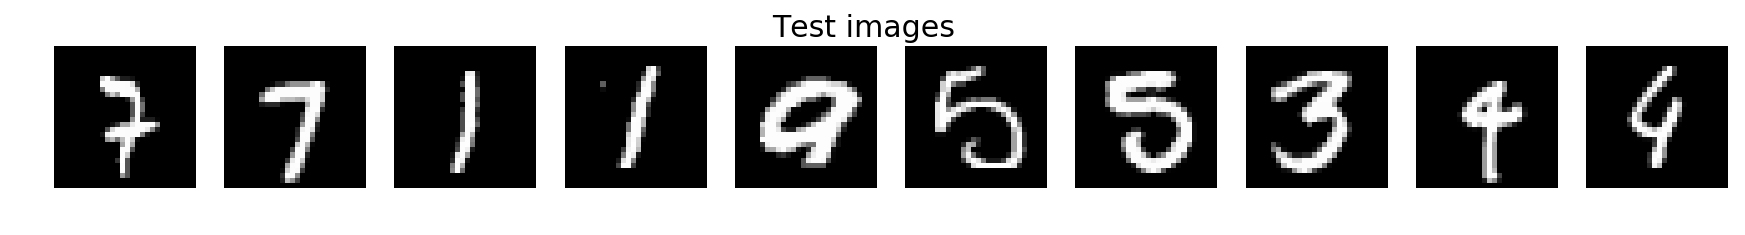

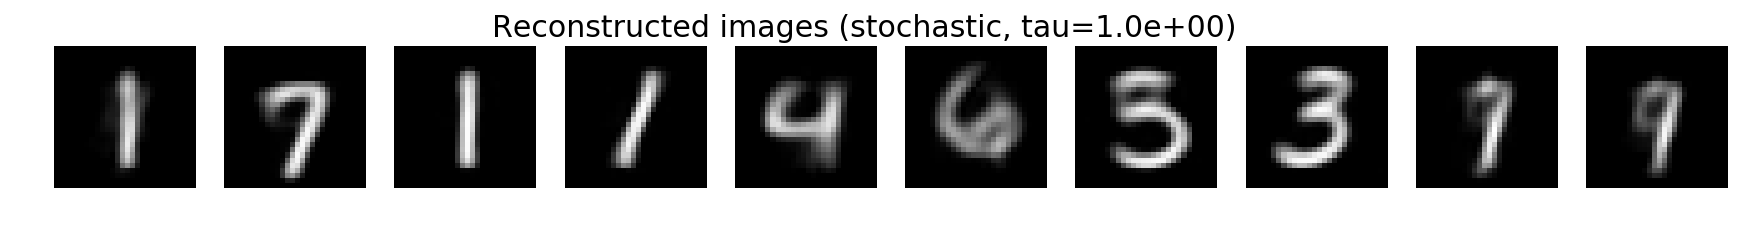

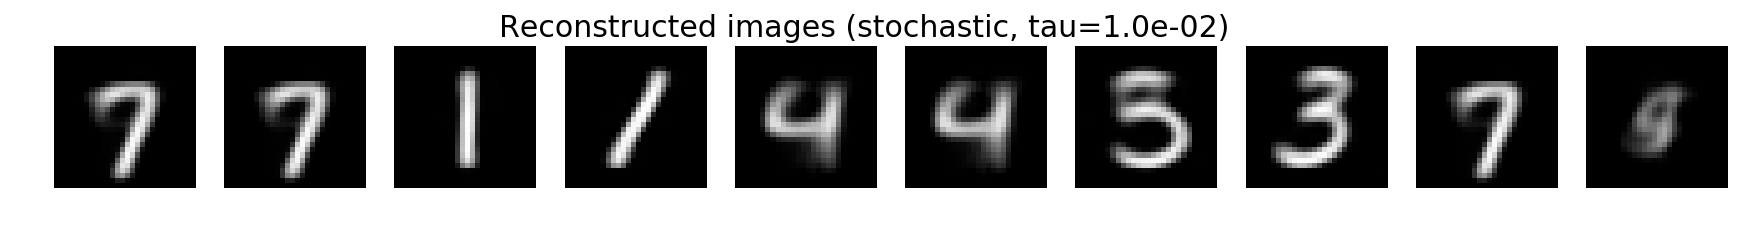

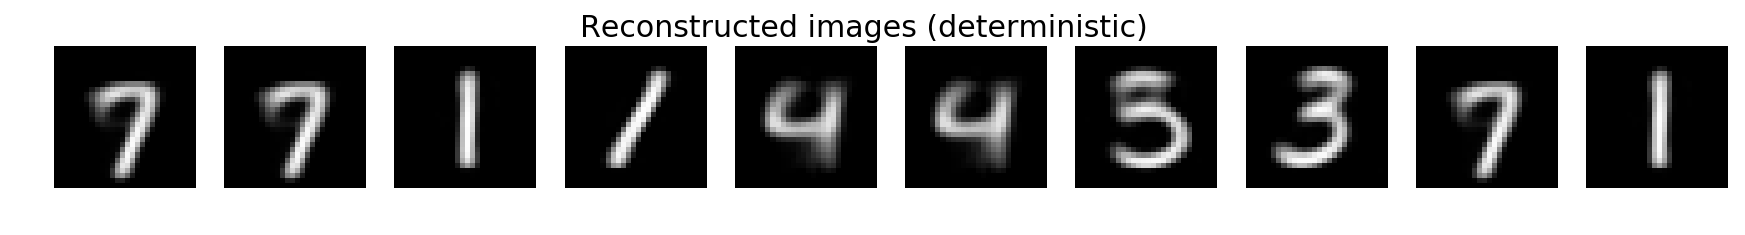

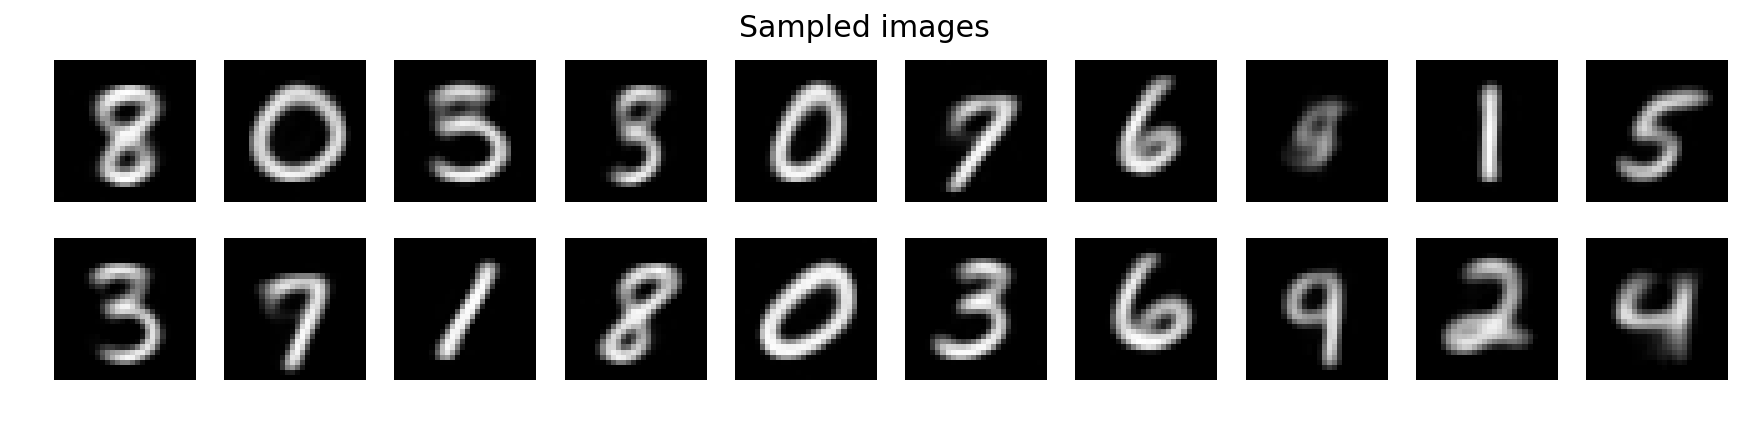

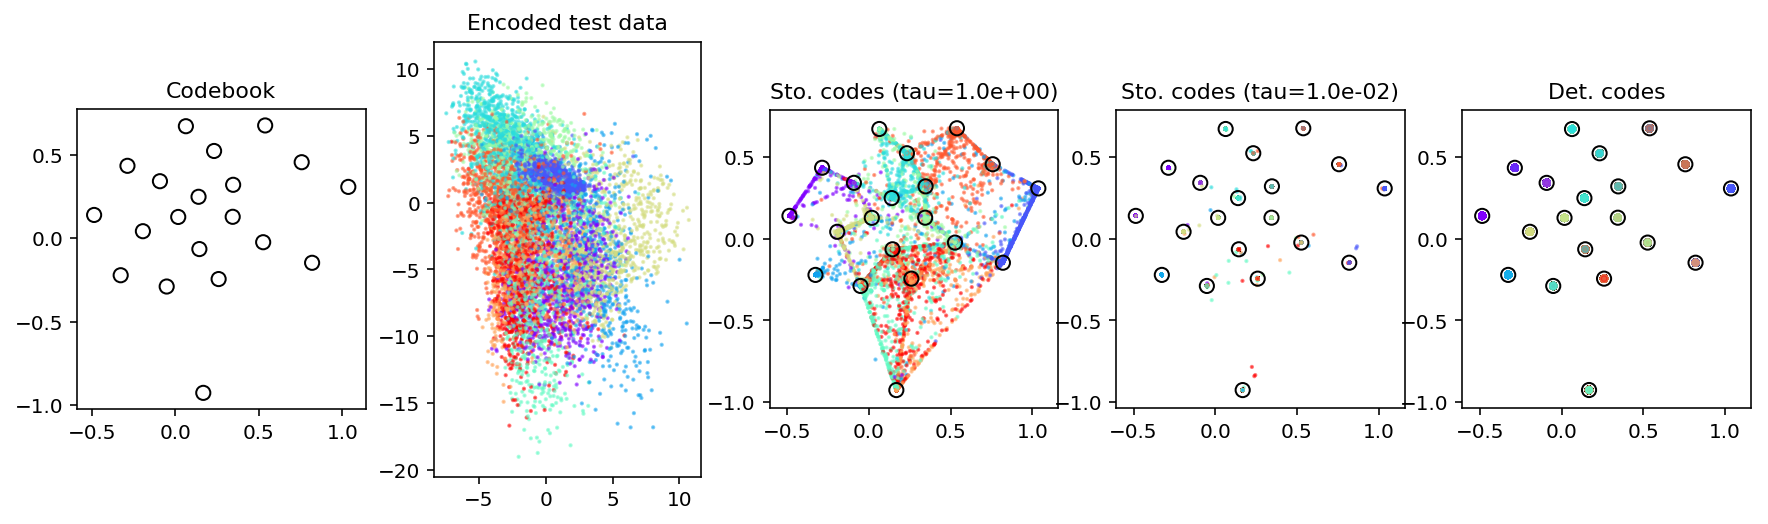

[31/100] total:[0.695] recon:[0.698] embedding:[-0.003]
[32/100] total:[0.695] recon:[0.699] embedding:[-0.003]
[33/100] total:[0.696] recon:[0.700] embedding:[-0.003]
[34/100] total:[0.695] recon:[0.699] embedding:[-0.003]
[35/100] total:[0.700] recon:[0.703] embedding:[-0.003]
[36/100] total:[0.696] recon:[0.699] embedding:[-0.003]
[37/100] total:[0.696] recon:[0.699] embedding:[-0.003]
[38/100] total:[0.698] recon:[0.701] embedding:[-0.003]
[39/100] total:[0.696] recon:[0.699] embedding:[-0.003]
[40/100] total:[0.699] recon:[0.702] embedding:[-0.003]


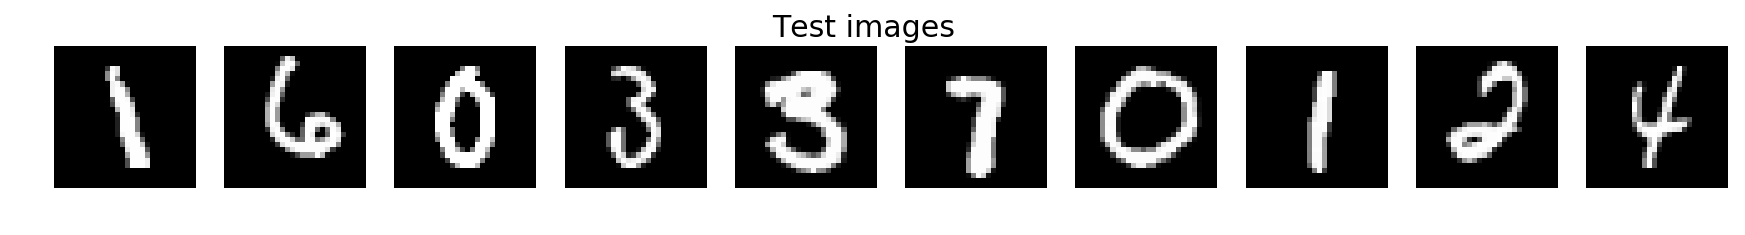

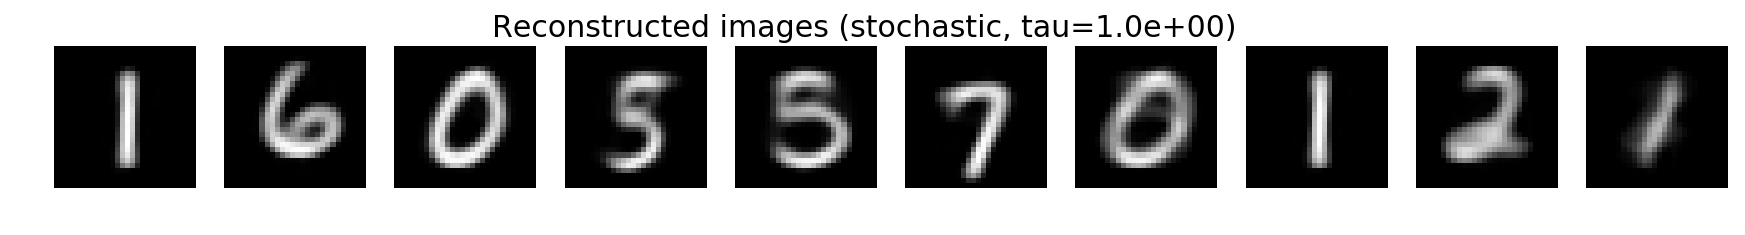

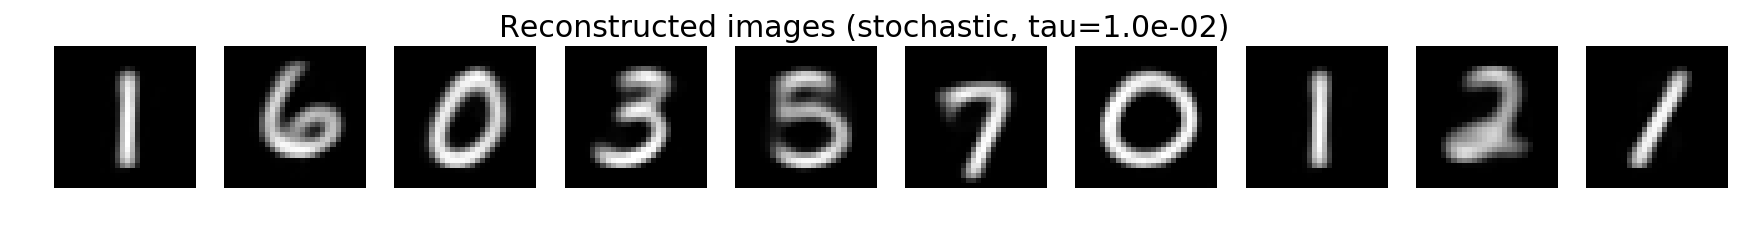

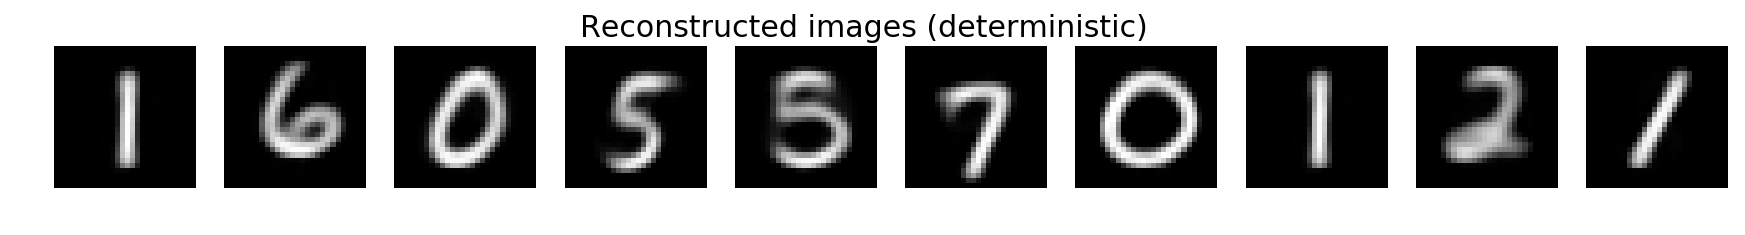

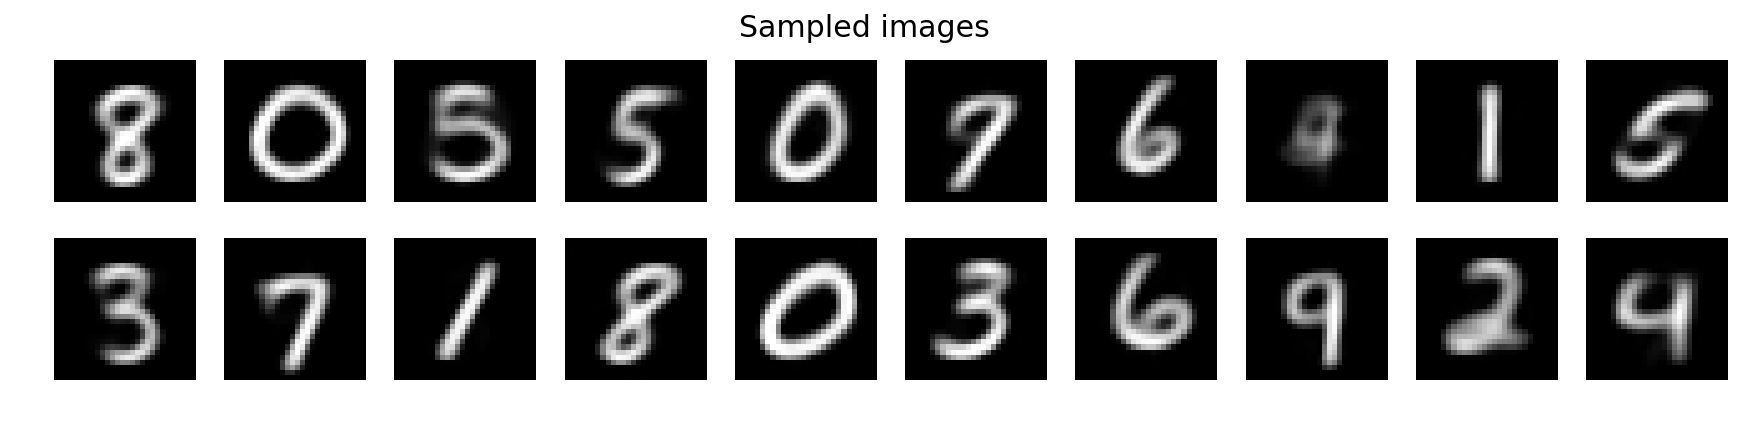

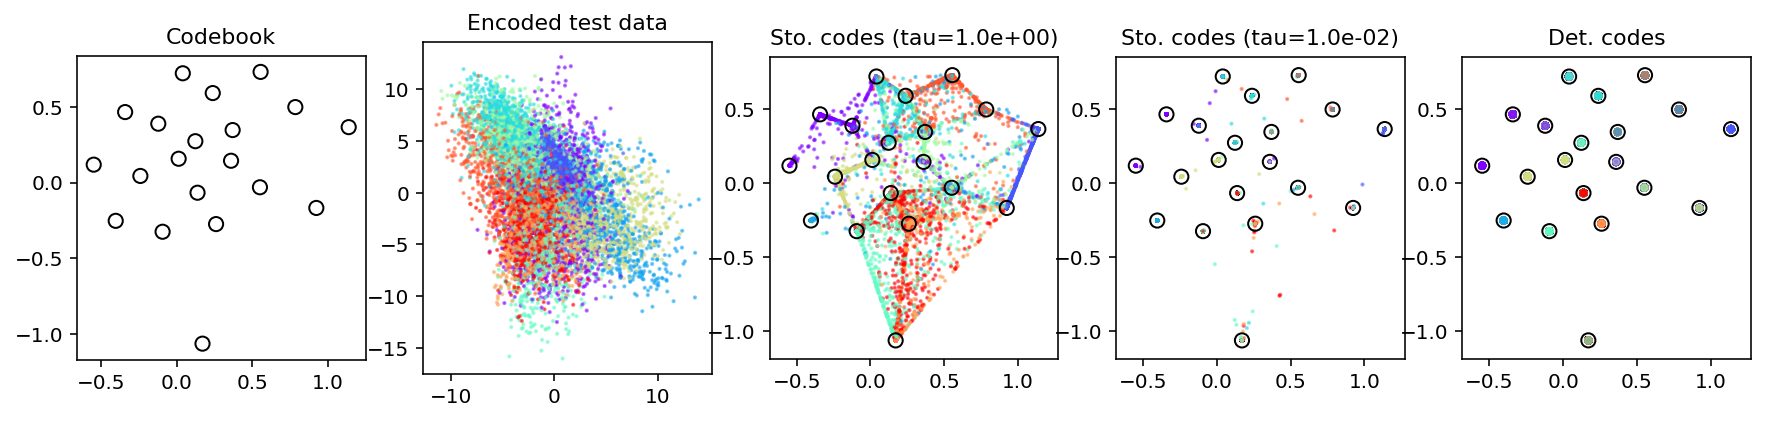

[41/100] total:[0.698] recon:[0.701] embedding:[-0.003]
[42/100] total:[0.701] recon:[0.704] embedding:[-0.003]
[43/100] total:[0.702] recon:[0.705] embedding:[-0.003]
[44/100] total:[0.699] recon:[0.702] embedding:[-0.003]
[45/100] total:[0.705] recon:[0.708] embedding:[-0.003]
[46/100] total:[0.708] recon:[0.711] embedding:[-0.003]
[47/100] total:[0.711] recon:[0.714] embedding:[-0.003]
[48/100] total:[0.707] recon:[0.710] embedding:[-0.003]
[49/100] total:[0.707] recon:[0.710] embedding:[-0.003]
[50/100] total:[0.711] recon:[0.714] embedding:[-0.003]


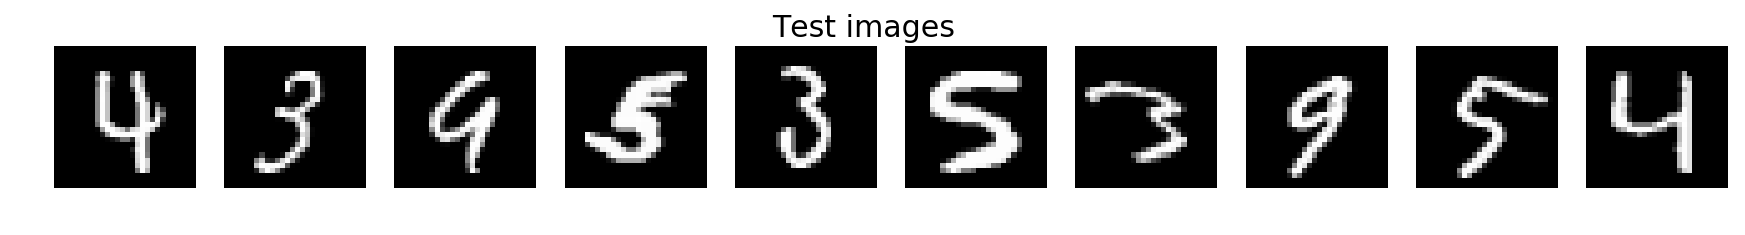

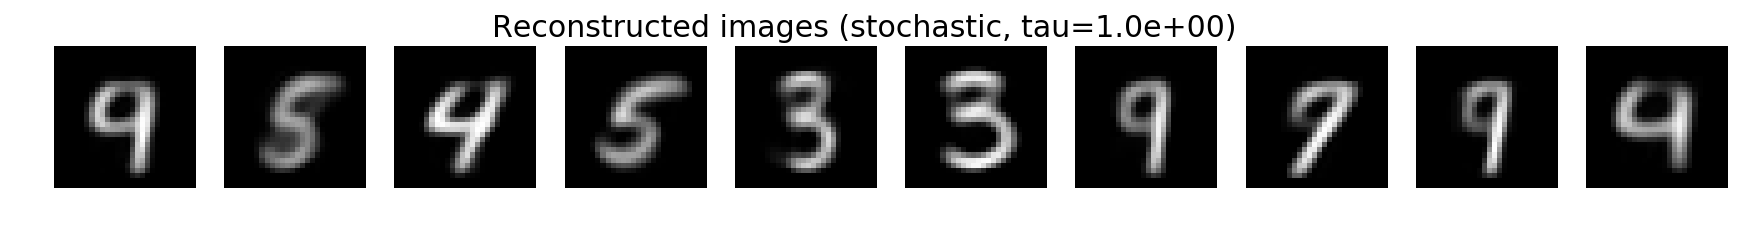

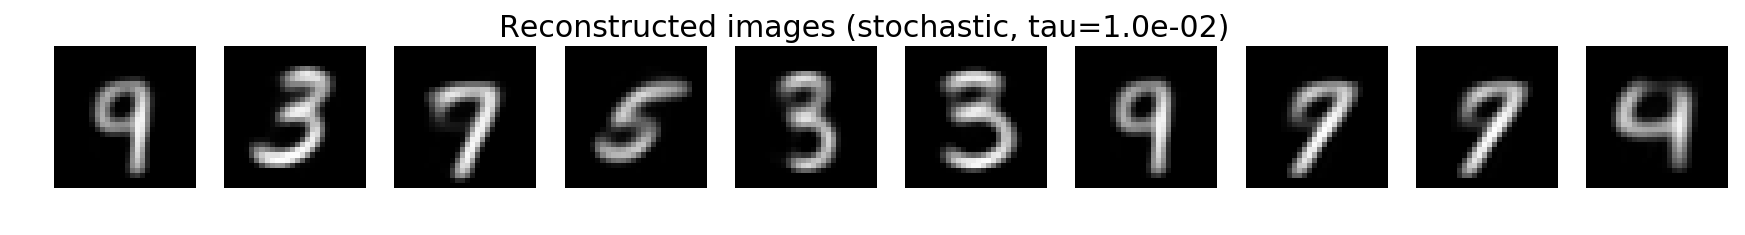

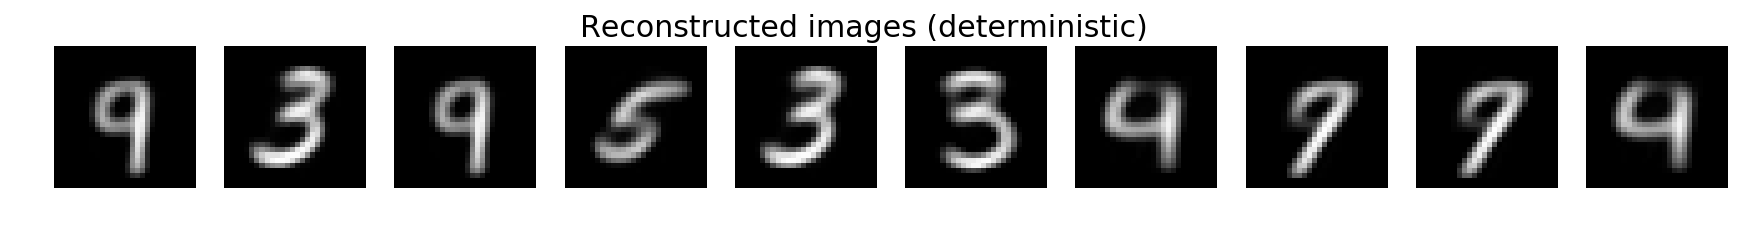

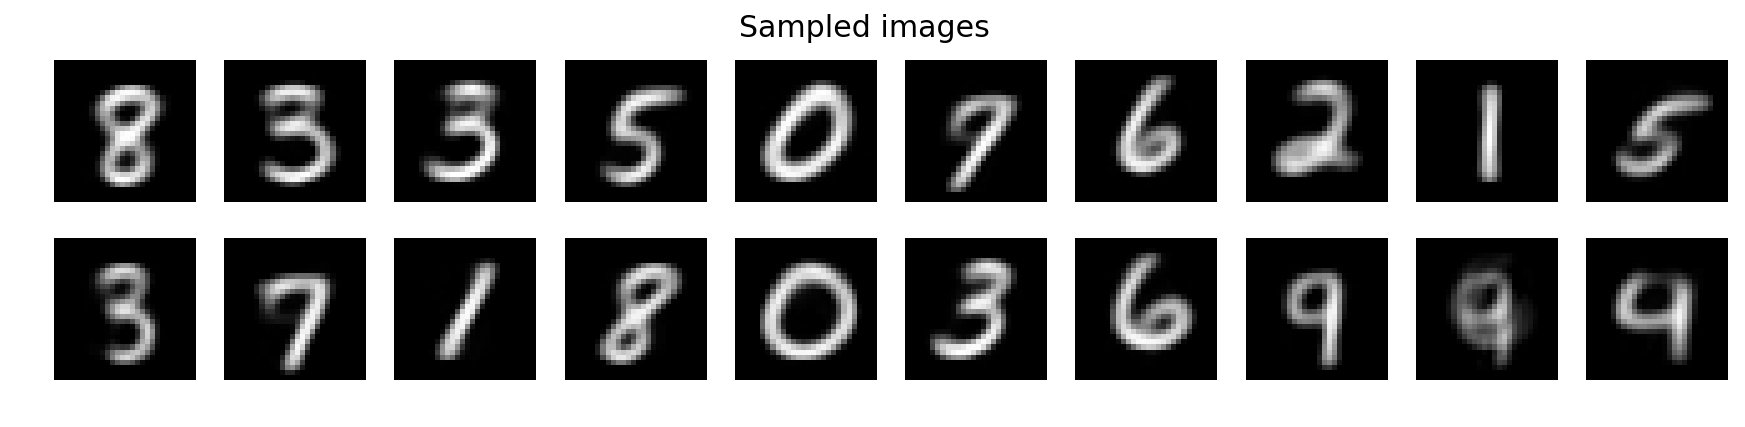

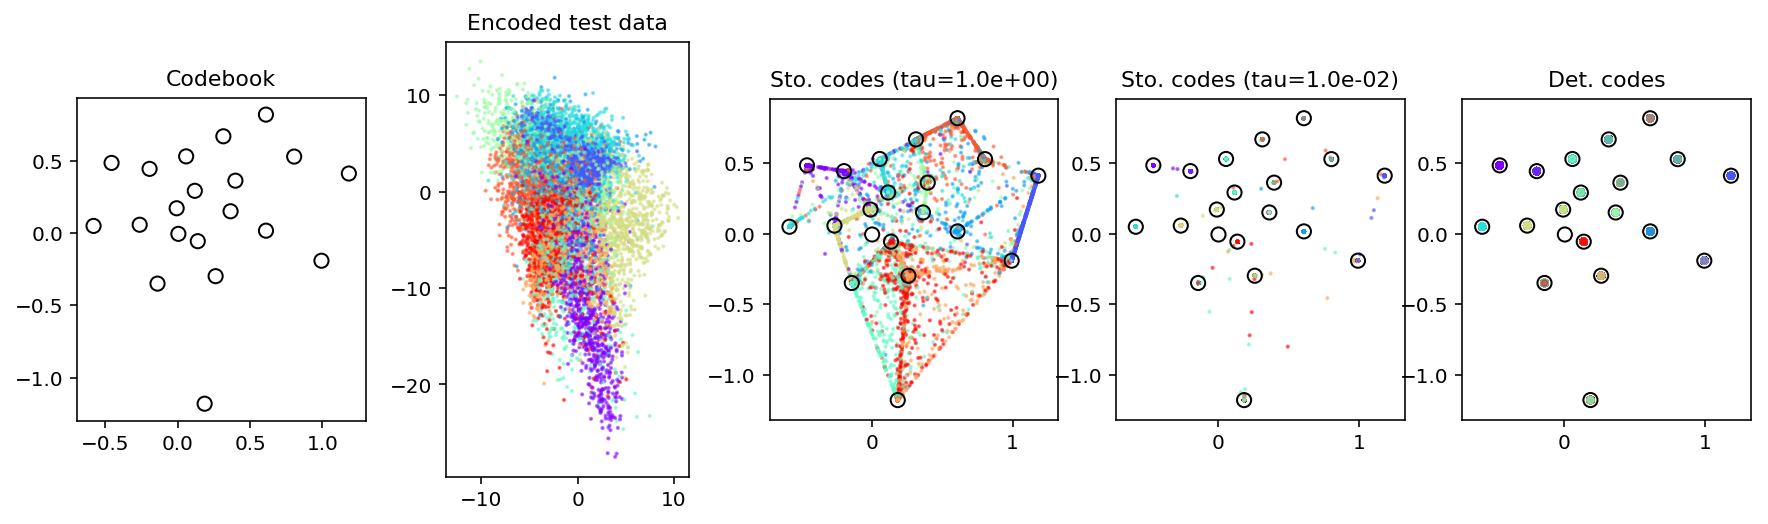

[51/100] total:[0.709] recon:[0.711] embedding:[-0.003]
[52/100] total:[0.707] recon:[0.710] embedding:[-0.003]
[53/100] total:[0.710] recon:[0.713] embedding:[-0.003]
[54/100] total:[0.710] recon:[0.712] embedding:[-0.003]
[55/100] total:[0.708] recon:[0.711] embedding:[-0.003]
[56/100] total:[0.709] recon:[0.712] embedding:[-0.002]
[57/100] total:[0.712] recon:[0.714] embedding:[-0.002]
[58/100] total:[0.714] recon:[0.716] embedding:[-0.002]
[59/100] total:[0.710] recon:[0.712] embedding:[-0.002]
[60/100] total:[0.709] recon:[0.711] embedding:[-0.002]


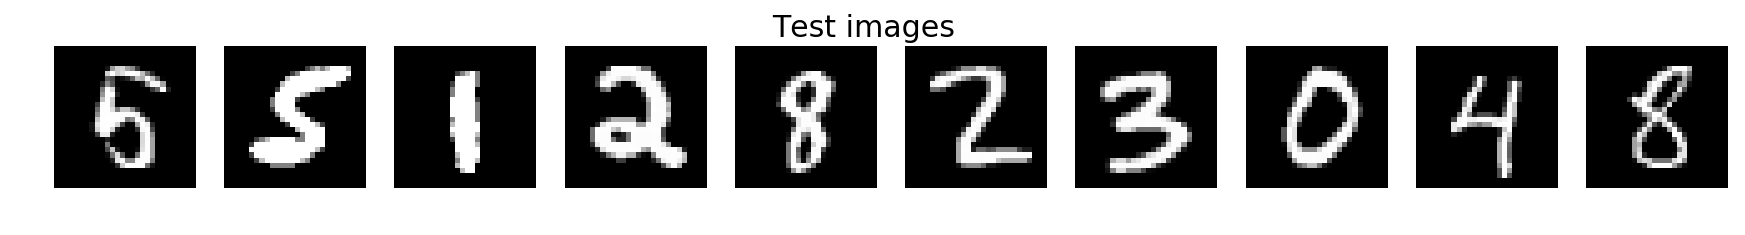

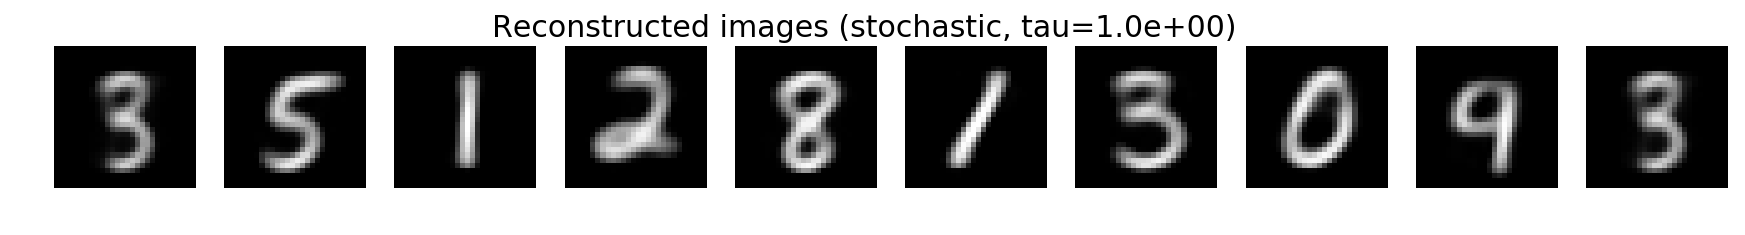

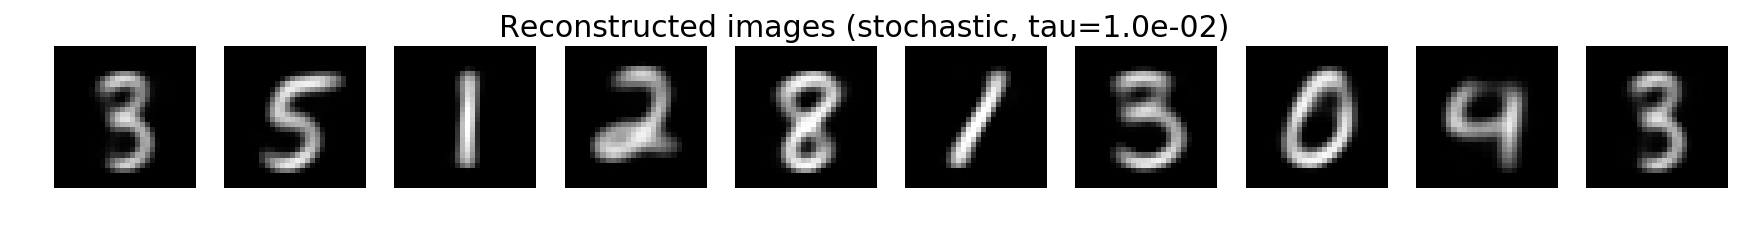

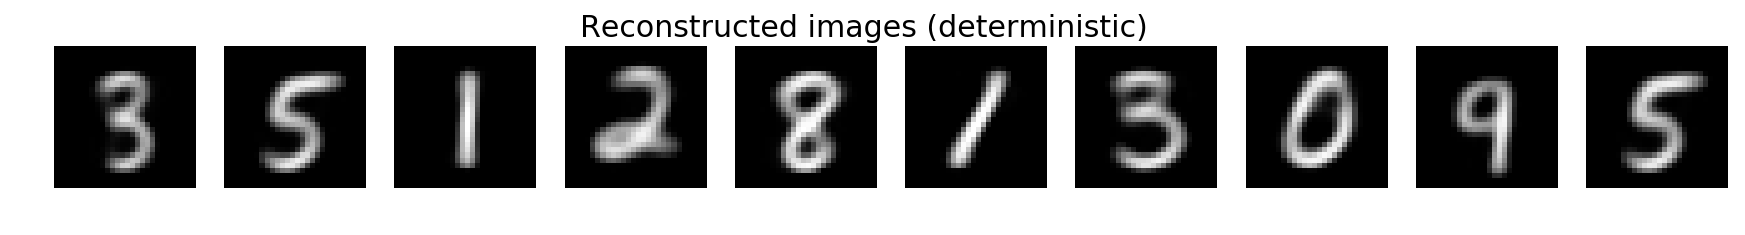

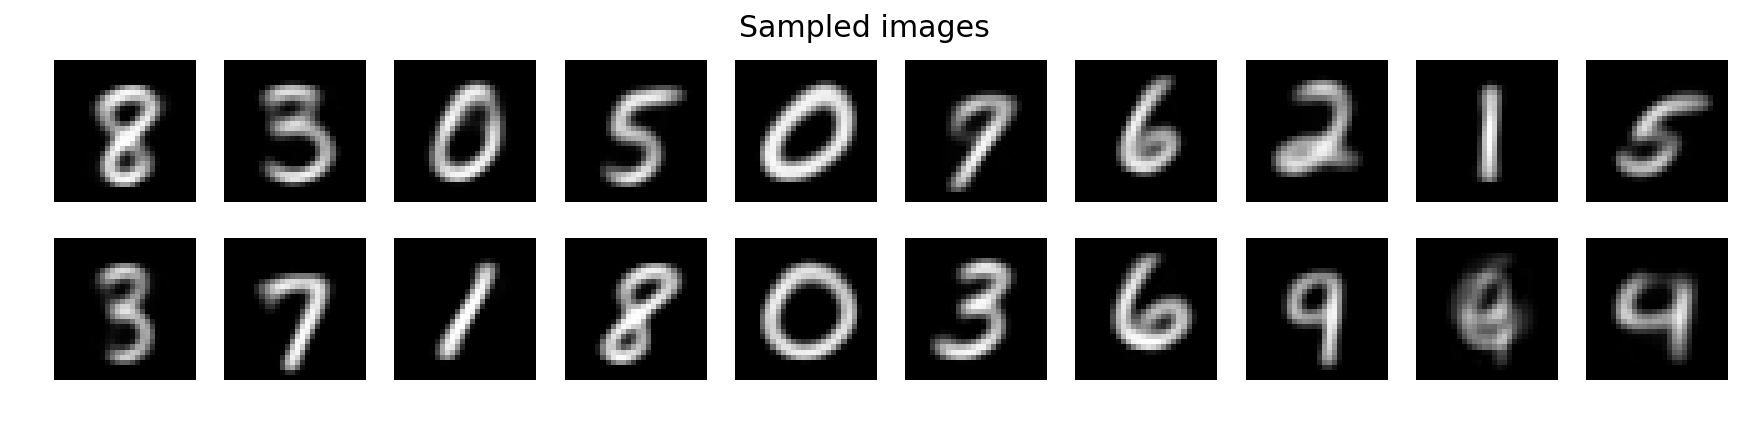

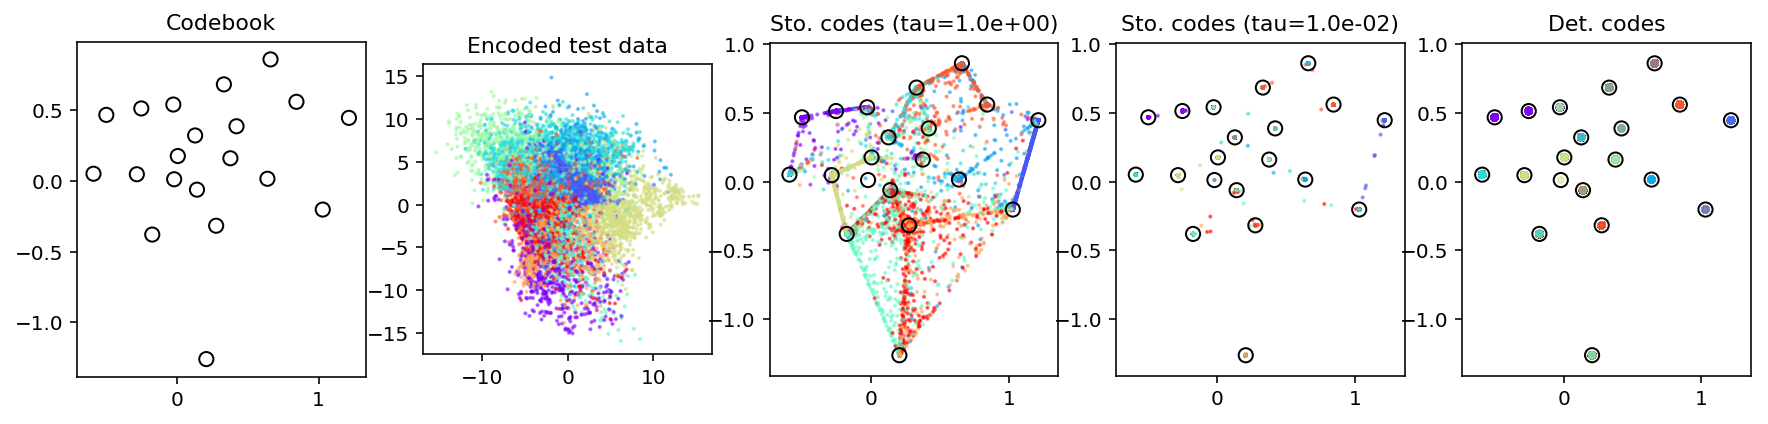

[61/100] total:[0.710] recon:[0.712] embedding:[-0.002]
[62/100] total:[0.708] recon:[0.710] embedding:[-0.002]
[63/100] total:[0.705] recon:[0.707] embedding:[-0.002]
[64/100] total:[0.705] recon:[0.707] embedding:[-0.002]
[65/100] total:[0.705] recon:[0.707] embedding:[-0.002]
[66/100] total:[0.706] recon:[0.708] embedding:[-0.002]
[67/100] total:[0.710] recon:[0.712] embedding:[-0.002]
[68/100] total:[0.715] recon:[0.716] embedding:[-0.002]
[69/100] total:[0.713] recon:[0.715] embedding:[-0.002]
[70/100] total:[0.715] recon:[0.716] embedding:[-0.002]


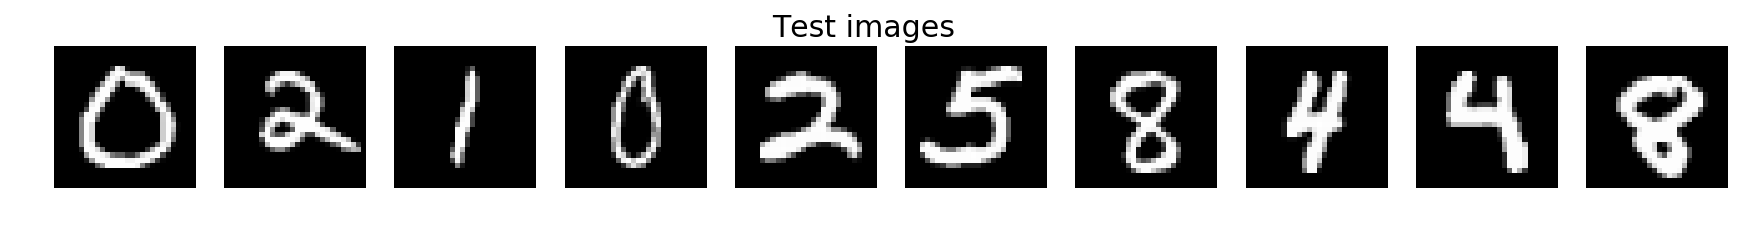

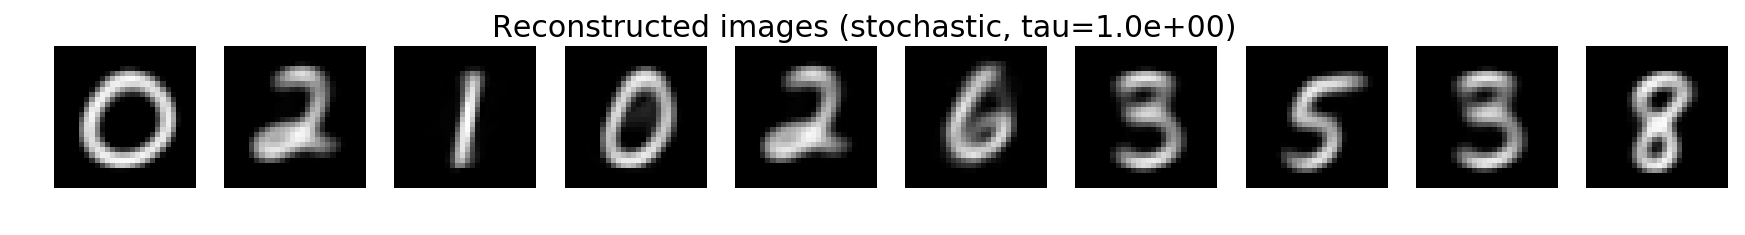

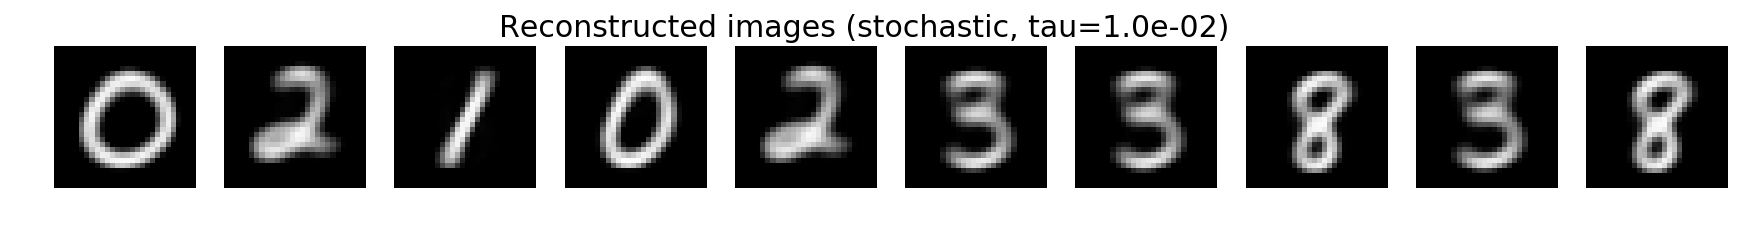

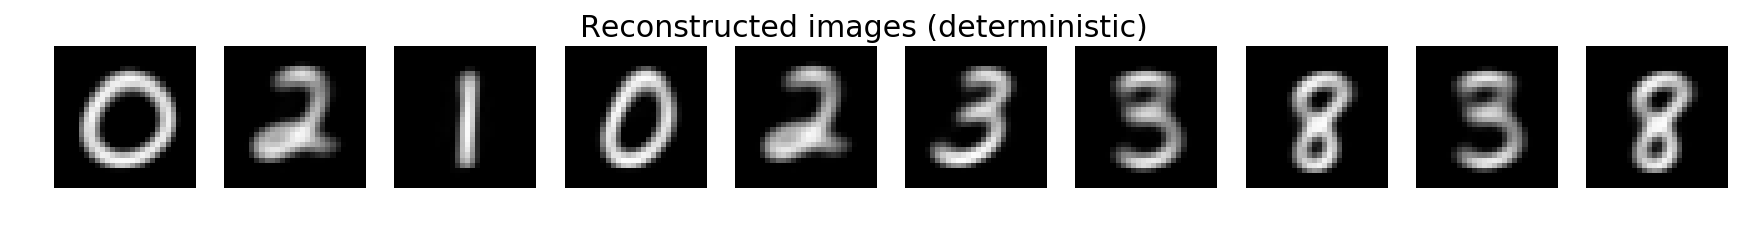

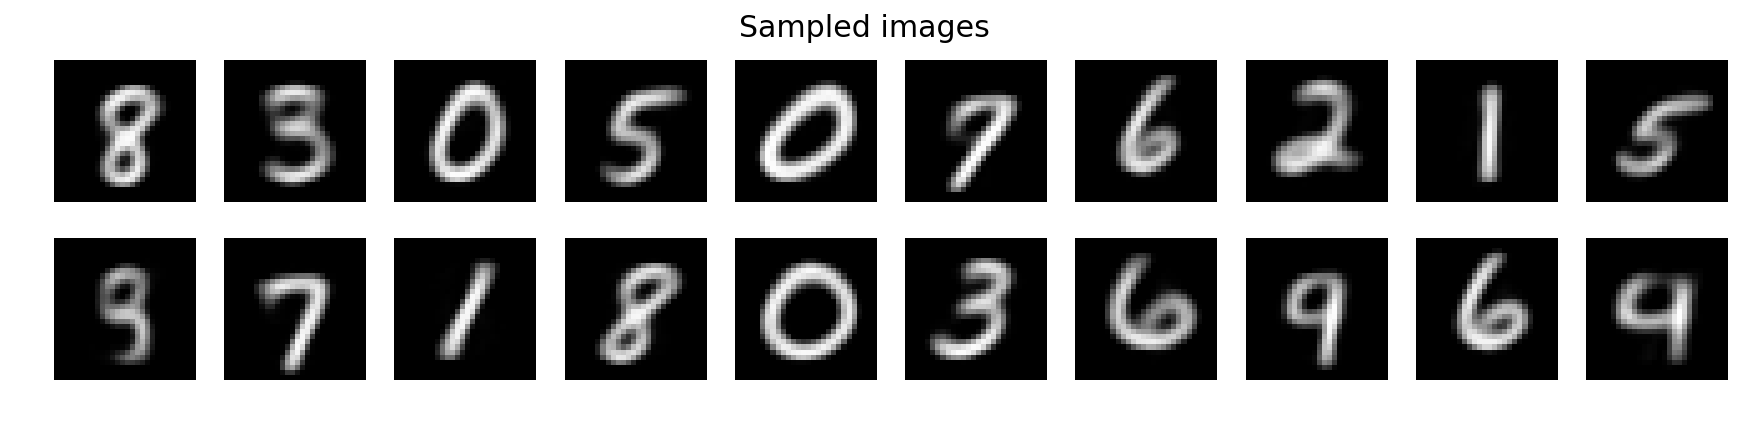

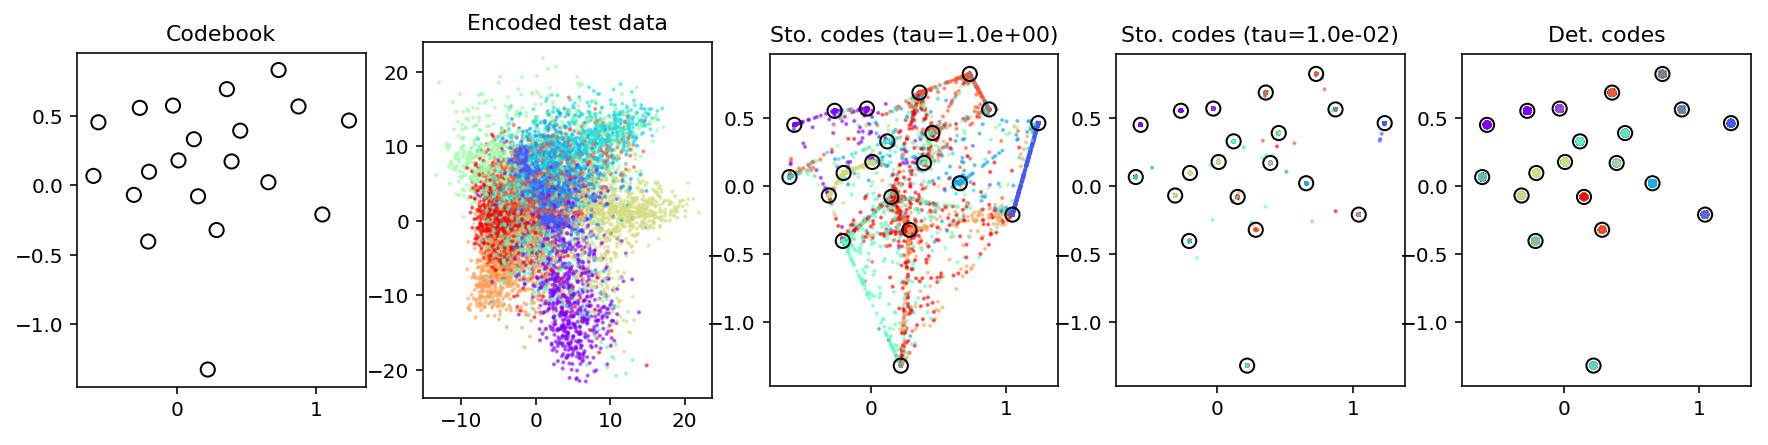

[71/100] total:[0.714] recon:[0.715] embedding:[-0.002]
[72/100] total:[0.710] recon:[0.712] embedding:[-0.002]
[73/100] total:[0.711] recon:[0.713] embedding:[-0.002]
[74/100] total:[0.714] recon:[0.715] embedding:[-0.002]
[75/100] total:[0.712] recon:[0.713] embedding:[-0.002]
[76/100] total:[0.715] recon:[0.716] embedding:[-0.001]
[77/100] total:[0.716] recon:[0.717] embedding:[-0.001]
[78/100] total:[0.714] recon:[0.715] embedding:[-0.001]
[79/100] total:[0.712] recon:[0.714] embedding:[-0.001]
[80/100] total:[0.713] recon:[0.714] embedding:[-0.001]


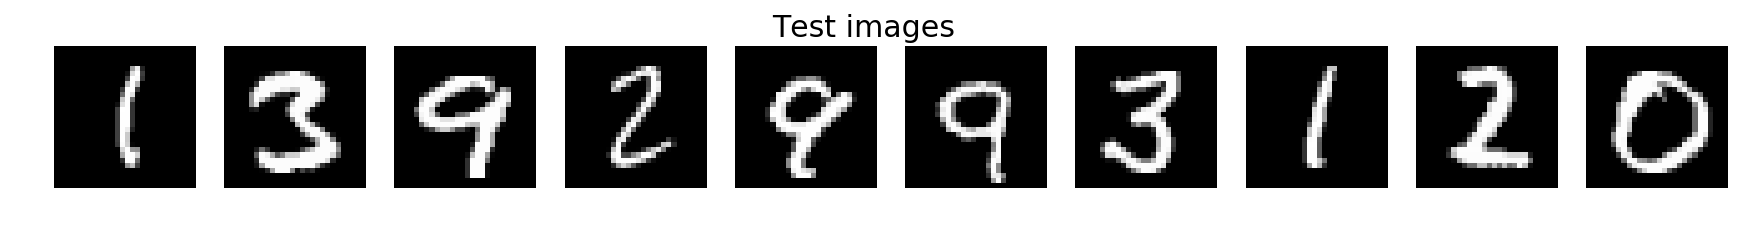

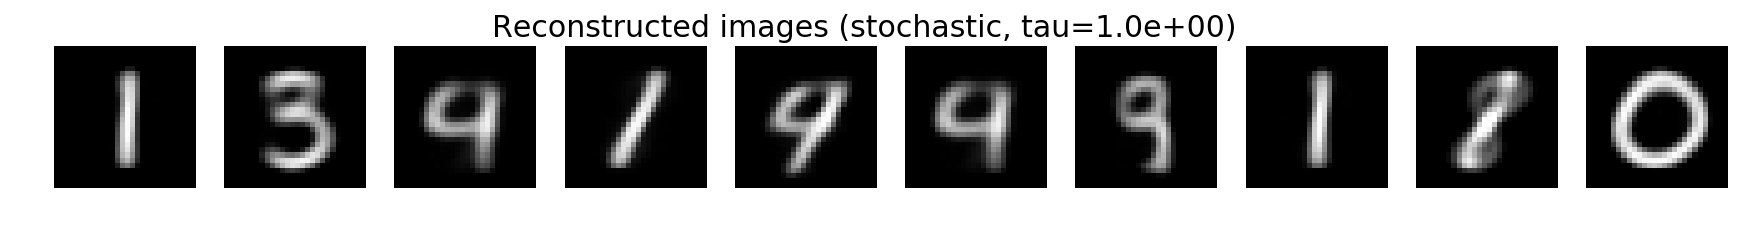

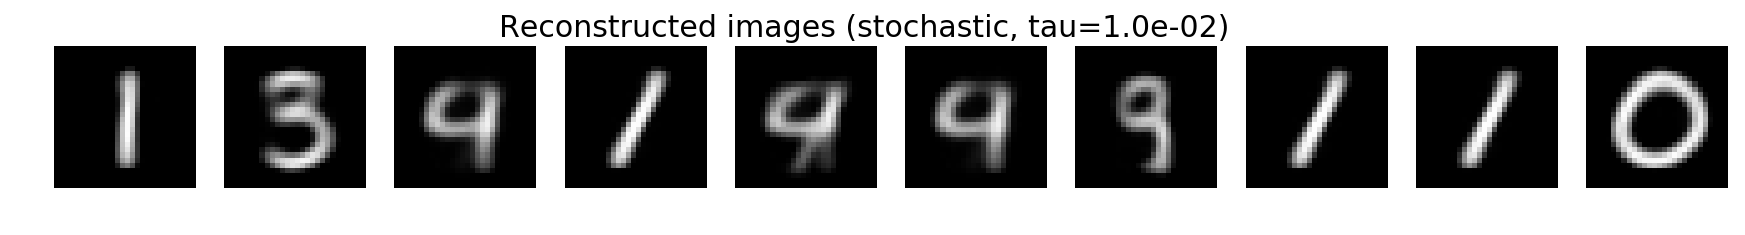

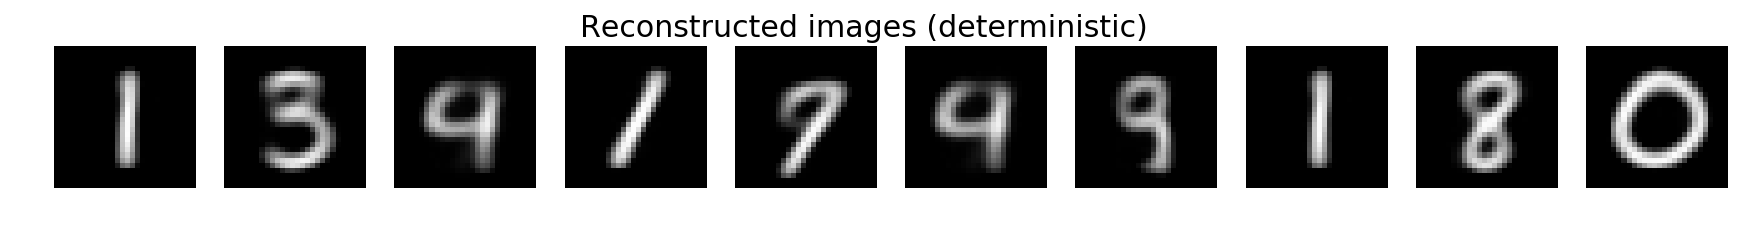

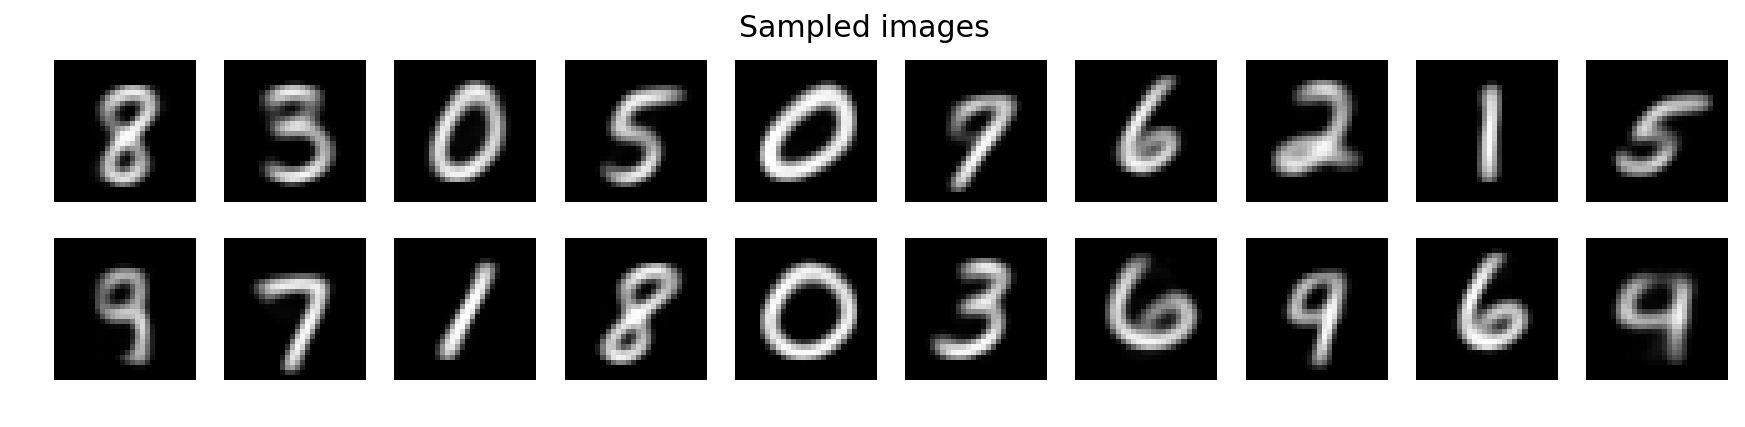

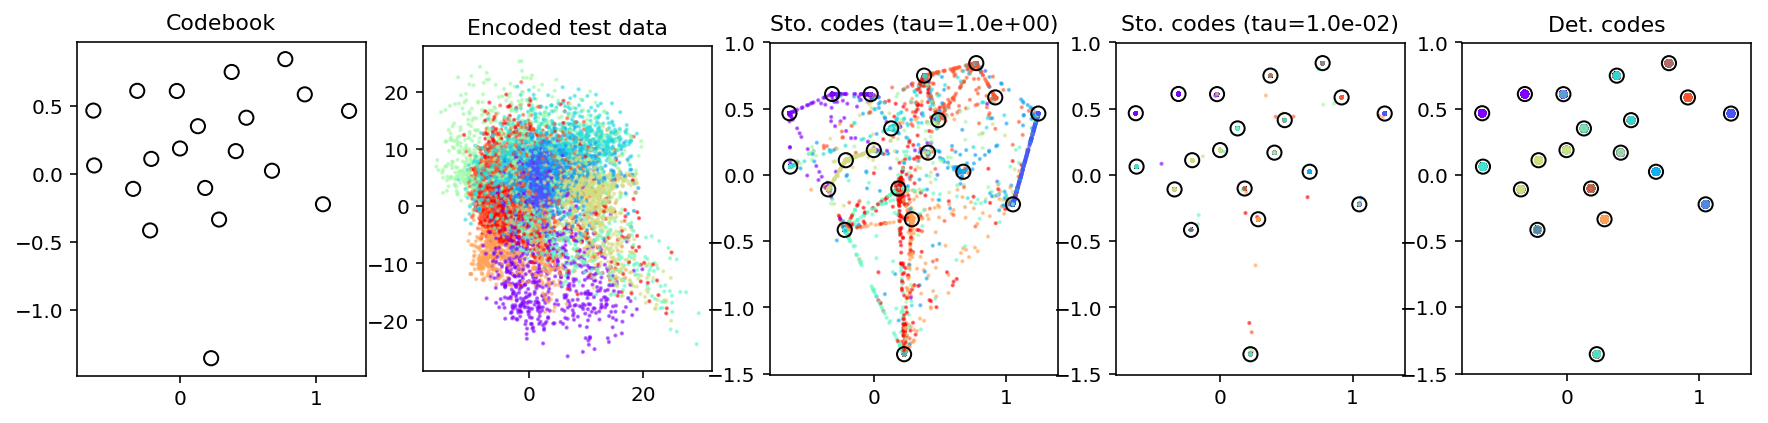

[81/100] total:[0.714] recon:[0.715] embedding:[-0.001]
[82/100] total:[0.719] recon:[0.720] embedding:[-0.001]
[83/100] total:[0.714] recon:[0.715] embedding:[-0.001]
[84/100] total:[0.715] recon:[0.716] embedding:[-0.001]
[85/100] total:[0.712] recon:[0.713] embedding:[-0.001]
[86/100] total:[0.717] recon:[0.718] embedding:[-0.001]
[87/100] total:[0.714] recon:[0.715] embedding:[-0.001]
[88/100] total:[0.720] recon:[0.720] embedding:[-0.001]
[89/100] total:[0.718] recon:[0.719] embedding:[-0.001]
[90/100] total:[0.719] recon:[0.720] embedding:[-0.001]


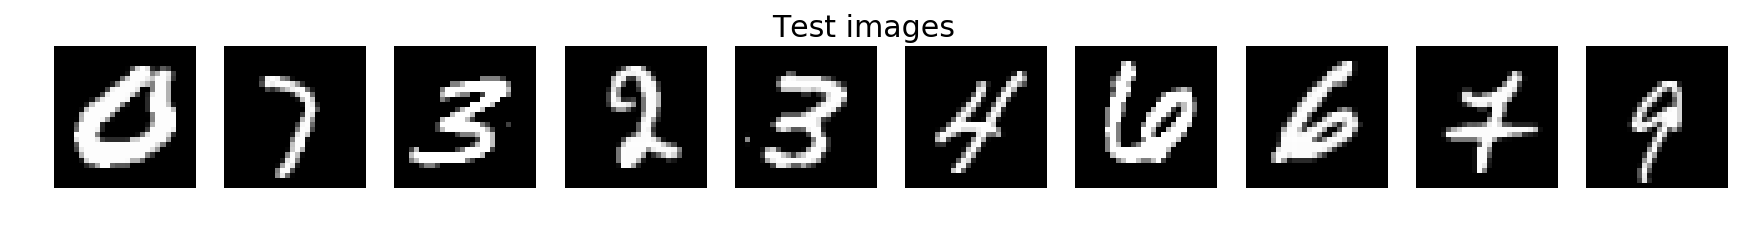

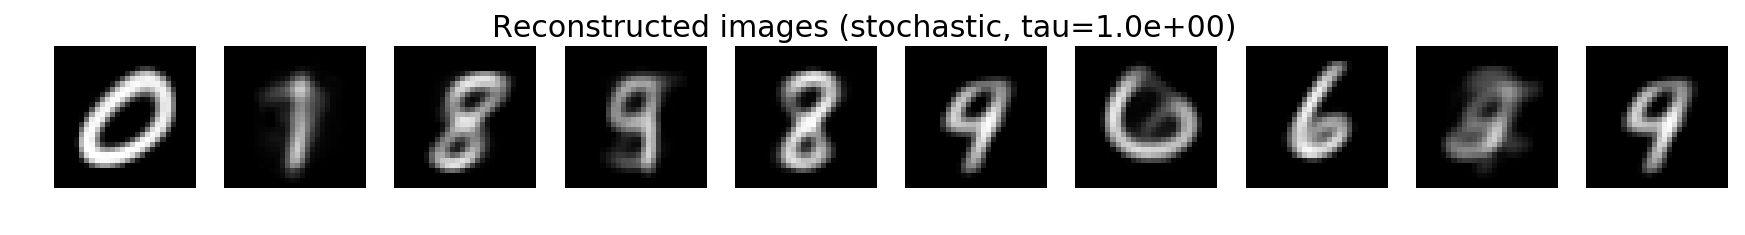

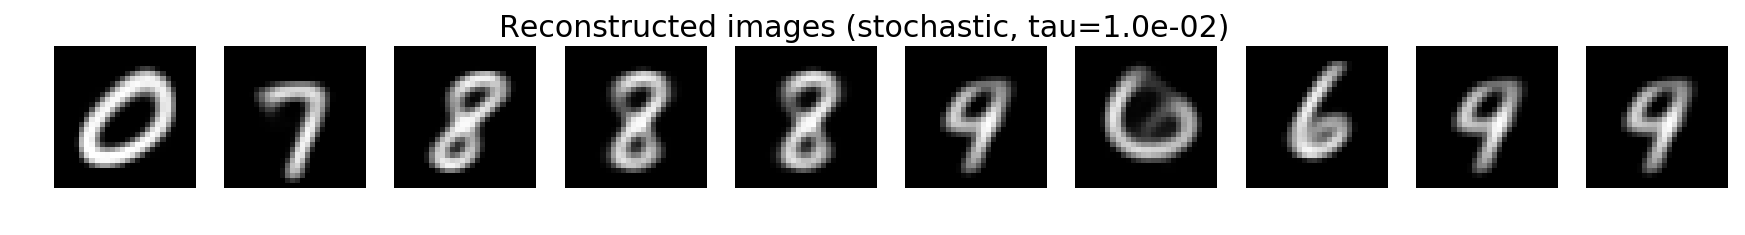

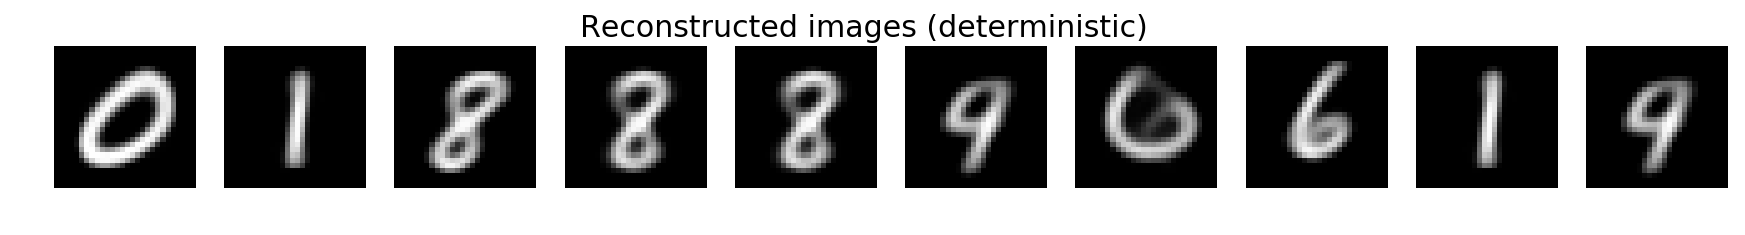

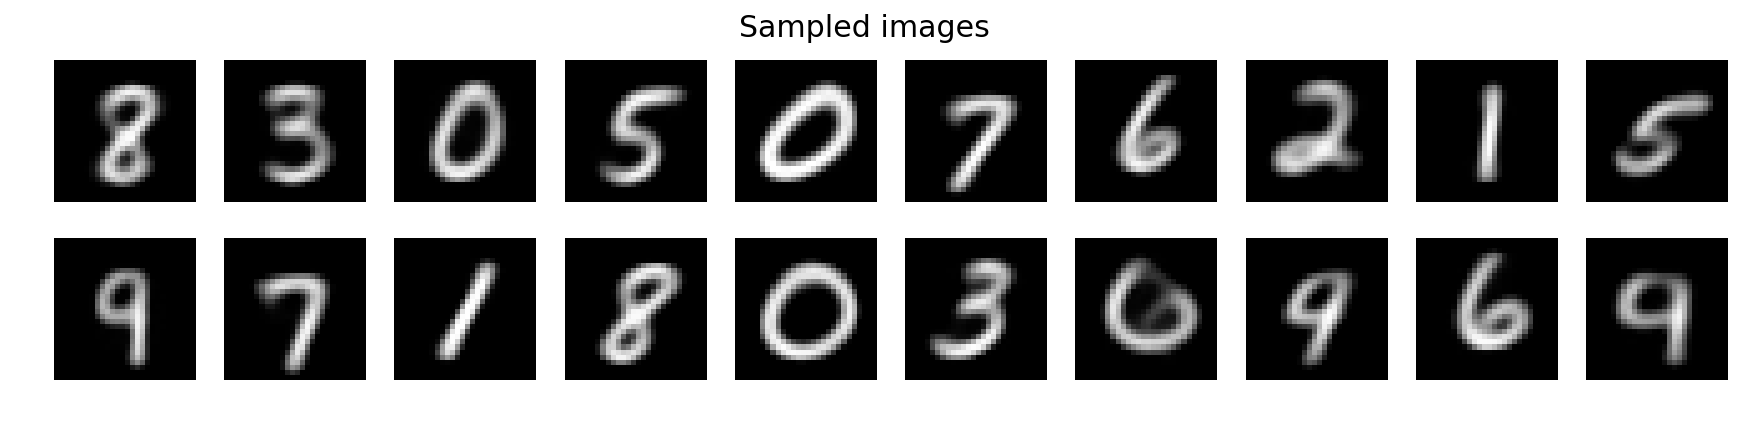

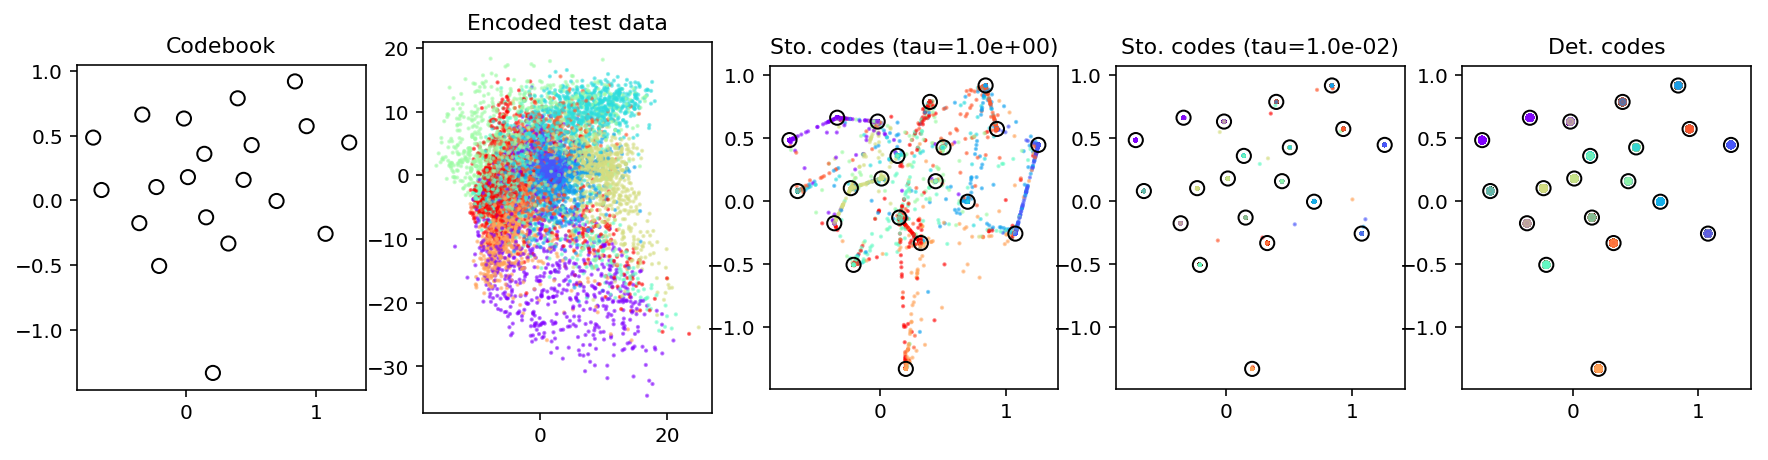

[91/100] total:[0.718] recon:[0.719] embedding:[-0.001]
[92/100] total:[0.719] recon:[0.720] embedding:[-0.001]
[93/100] total:[0.728] recon:[0.729] embedding:[-0.001]
[94/100] total:[0.718] recon:[0.719] embedding:[-0.001]
[95/100] total:[0.720] recon:[0.721] embedding:[-0.001]
[96/100] total:[0.719] recon:[0.720] embedding:[-0.001]
[97/100] total:[0.720] recon:[0.721] embedding:[-0.001]
[98/100] total:[0.724] recon:[0.725] embedding:[-0.001]
[99/100] total:[0.733] recon:[0.734] embedding:[-0.001]


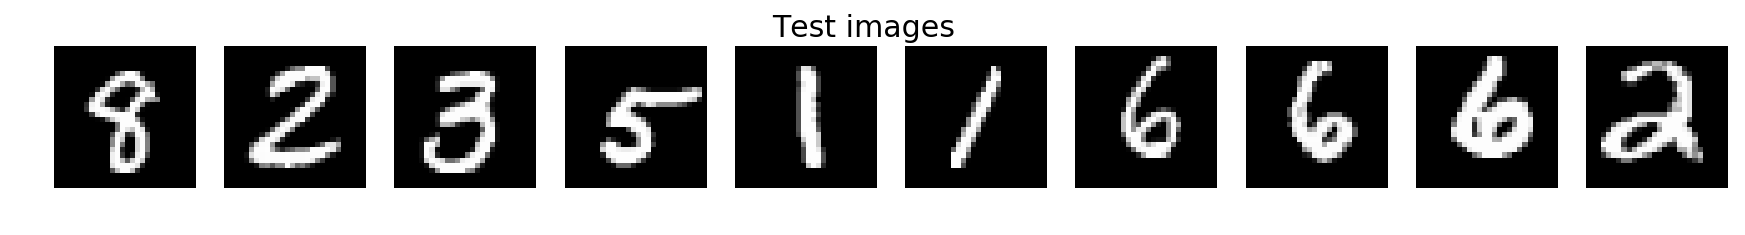

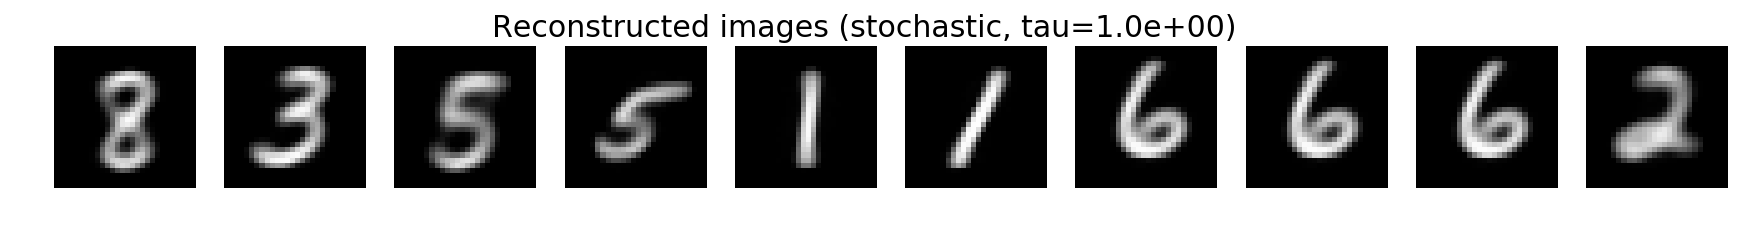

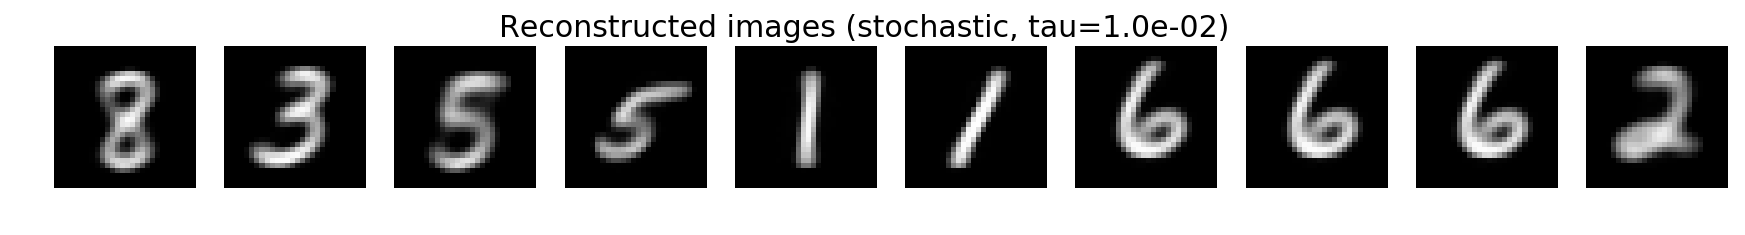

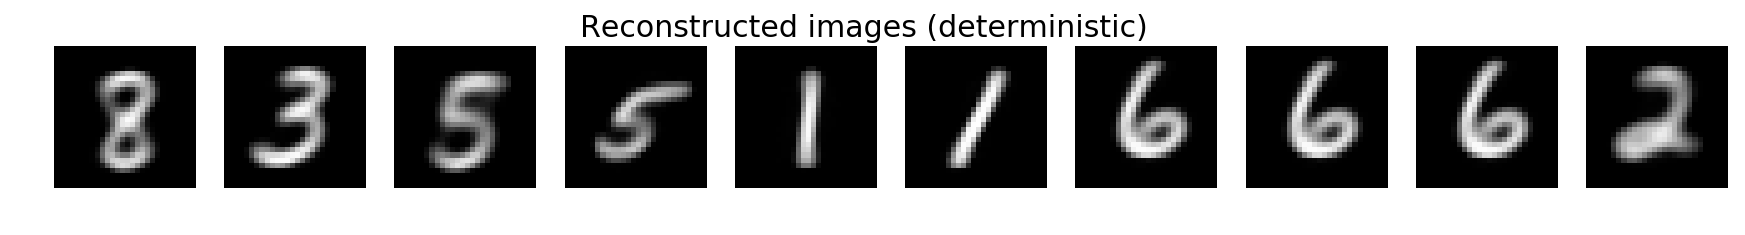

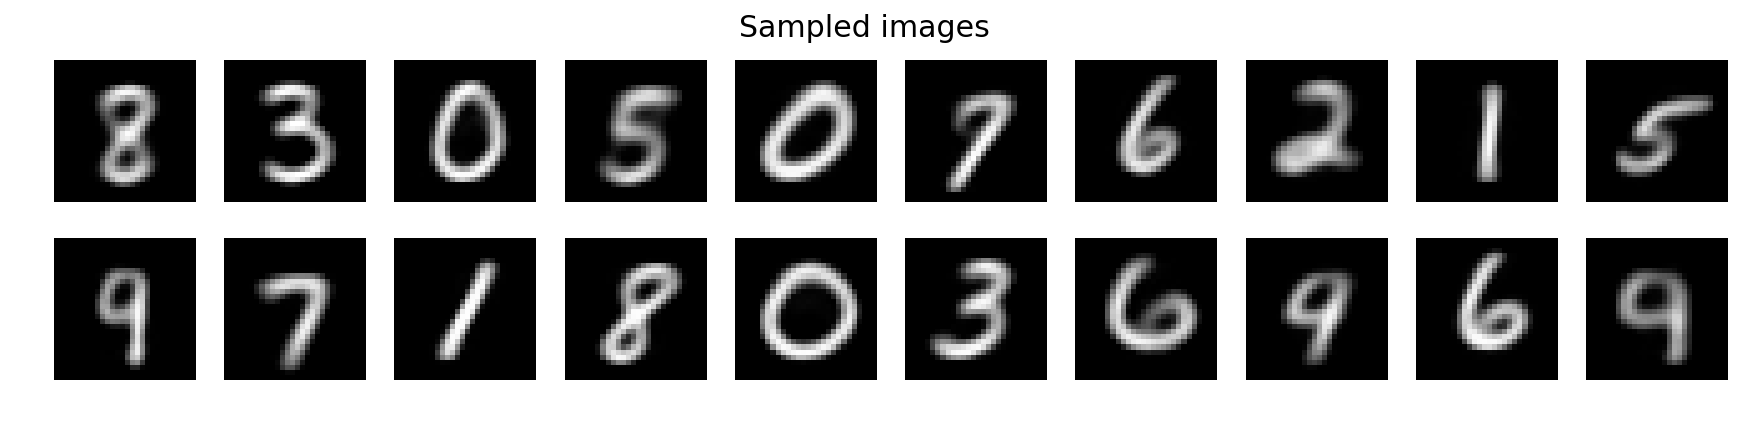

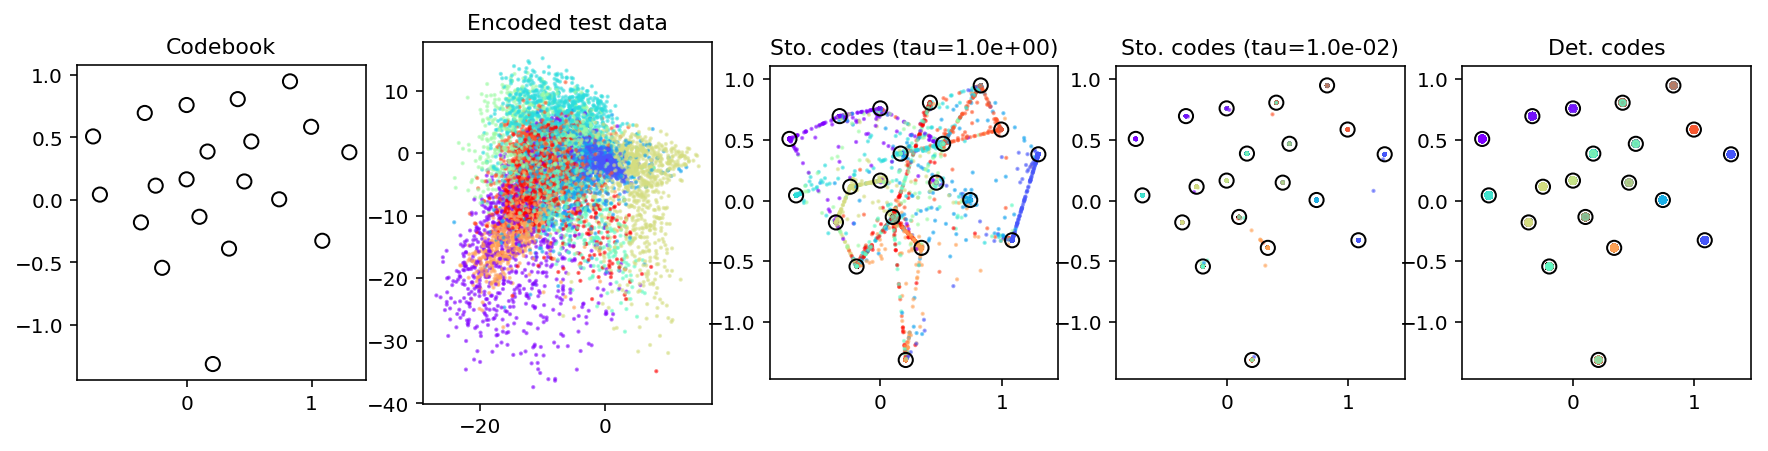

Done.


In [5]:
print ("Start training.")
G.init_params()
for epoch in range(n_epoch):
    zero_to_one = float(epoch/(n_epoch-1))
    one_to_zero = 1-zero_to_one
    loss_recon_sum,loss_embedding_sum,loss_total_sum,n_batch_sum = 0.0,0.0,0.0,0
    rand_idxs = np.random.permutation(n_train)
    for it in range(n_it):
        batch_idx     = rand_idxs[it*batch_size:(it+1)*batch_size]
        x_batch_torch = x_train_torch[batch_idx,:].to(G.device)
        n_batch       = x_batch_torch.shape[0]
        # Update
        tau = (G.tau_max-G.tau_min)*one_to_zero + G.tau_min
        total_loss_out,loss_info = G.loss_total(
            x               = x_batch_torch.to(G.device),
            LOSS_TYPE       = 'L1+L2', # 'L1+L2'
            recon_loss_gain = 10.0,
            tau             = tau)
        optm.zero_grad(); total_loss_out.backward(); optm.step()
        loss_total_sum      = loss_total_sum + n_batch*loss_info['loss_total_out']
        loss_recon_sum      = loss_recon_sum + n_batch*loss_info['loss_recon_out']
        loss_embedding_sum  = loss_embedding_sum + n_batch*loss_info['loss_embedding_out']
        n_batch_sum         = n_batch_sum + n_batch
    loss_total_avg     = loss_total_sum / n_batch_sum
    loss_recon_avg     = loss_recon_sum / n_batch_sum
    loss_embedding_avg = loss_embedding_sum / n_batch_sum
    # Print
    print ("[%d/%d] total:[%.3f] recon:[%.3f] embedding:[%.3f]"%
           (epoch,n_epoch,loss_total_avg,loss_recon_avg,loss_embedding_avg))
    # Plot test images
    if ((epoch%plot_every) == 0) or (epoch==(n_epoch-1)):
        gqvae_mnist_debug(G=G,x_test_np=x_test_np,y_test_np=y_test_np)
print ("Done.")